<a href="https://colab.research.google.com/github/padhikari26/Covid-19_ResearchProject/blob/main/Covid_19_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit
import streamlit as st



import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 482.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

confirmed_df = pd.read_csv(url, sep=',')
display(confirmed_df)

url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_df = pd.read_csv(url2, sep=',')
display(deaths_df)

url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered_df = pd.read_csv(url3, sep=',')
display(recovered_df)

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...   209322  209340   
1          0        0        0        0        0  ...   334391  334408   
2          0        0        0        0        0  ...   271441  271448   
3          0        0        0        0        0  ...    47866   47875   
4          0        0        0        0        0  ...   105255  105277   
..       ...      ...      ...      ...      ...  ...      ...     ...   
284        0        0        0        0        0  ...   703228  703228   
285        0        0        0        0        0  ...      535     535   
286        0        0        0        0        0  ...    11945   11945   
287        0        0        0        0        0  ...   343012  343012   
288        0        0        0        0        0  ...   263921  264127   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    209358  209362  209369  209390  209406  209436  209451  209451  
1    334408  334427  334427  334427  334427  334427  334443  334457  
2    271463  271469  271469  271477  271477  271490  271494  271496  
3     47875   47875   47875   47875   47875   47875   47890   47890  
4    105277  105277  105277  105277  105277  105277  105288  105288  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284  703228  703228  703228  703228  703228  703228  703228  703228  
285     535     535     535     535     535     535     535     535  
286   11945   11945   11945   11945   11945   11945   11945   11945  
287  343079  343079  343079  343135  343135  343135  343135  343135  
288  264127  264127  264127  264127  264127  264127  264276  264276  

[289 rows x 1147 columns]

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...     7896    7896   
1          0        0        0        0        0  ...     3598    3598   
2          0        0        0        0        0  ...     6881    6881   
3          0        0        0        0        0  ...      165     165   
4          0        0        0        0        0  ...     1933    1933   
..       ...      ...      ...      ...      ...  ...      ...     ...   
284        0        0        0        0        0  ...     5708    5708   
285        0        0        0        0        0  ...        0       0   
286        0        0        0        0        0  ...     2159    2159   
287        0        0        0        0        0  ...     4057    4057   
288        0        0        0        0        0  ...     5663    5668   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0      7896    7896    7896    7896    7896    7896    7896    7896  
1      3598    3598    3598    3598    3598    3598    3598    3598  
2      6881    6881    6881    6881    6881    6881    6881    6881  
3       165     165     165     165     165     165     165     165  
4      1933    1933    1933    1933    1933    1933    1933    1933  
..      ...     ...     ...     ...     ...     ...     ...     ...  
284    5708    5708    5708    5708    5708    5708    5708    5708  
285       0       0       0       0       0       0       0       0  
286    2159    2159    2159    2159    2159    2159    2159    2159  
287    4057    4057    4057    4057    4057    4057    4057    4057  
288    5668    5668    5668    5668    5668    5668    5671    5671  

[289 rows x 1147 columns]

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
269            NaN    West Bank and Gaza  31.952200   35.233200        0   
270            NaN  Winter Olympics 2022  39.904200  116.407400        0   
271            NaN                 Yemen  15.552727   48.516388        0   
272            NaN                Zambia -13.133897   27.849332        0   
273            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  \
0          0        0        0        0        0  ...        0       0   
1          0        0        0        0        0  ...        0       0   
2          0        0        0        0        0  ...        0       0   
3          0        0        0        0        0  ...        0       0   
4          0        0        0        0        0  ...        0       0   
..       ...      ...      ...      ...      ...  ...      ...     ...   
269        0        0        0        0        0  ...        0       0   
270        0        0        0        0        0  ...        0       0   
271        0        0        0        0        0  ...        0       0   
272        0        0        0        0        0  ...        0       0   
273        0        0        0        0        0  ...        0       0   

     3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0         0       0       0       0       0       0       0       0  
1         0       0       0       0       0       0       0       0  
2         0       0       0       0       0       0       0       0  
3         0       0       0       0       0       0       0       0  
4         0       0       0       0       0       0       0       0  
..      ...     ...     ...     ...     ...     ...     ...     ...  
269       0       0       0       0       0       0       0       0  
270       0       0       0       0       0       0       0       0  
271       0       0       0       0       0       0       0       0  
272       0       0       0       0       0       0       0       0  
273       0       0       0       0       0       0       0       0  

[274 rows x 1147 columns]

In [4]:
display(confirmed_df.describe())
display(deaths_df.describe())
display(recovered_df.describe())
print(confirmed_df.columns)

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    1.927336    2.273356    3.266436    4.972318   
std     25.956609   77.870931   26.173664   26.270191   32.707271   45.523871   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       2/28/23  \
count   289.000000   289.000000   289.000000   289.000000  ...  2.890000e+02   
mean      7.335640    10.134948    19.307958    21.346021  ...  2.336755e+06   
std      63.623197    85.724481   210.329649   211.628535  ...  8.506608e+06   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  1.456700e+04   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.032480e+05   
75%       0.000000     0.000000     0.000000     0.000000  ...  1.051998e+06   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  1.034435e+08   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.337519e+06  2.338173e+06  2.338805e+06  2.338992e+06  2.339187e+06   
std    8.511285e+06  8.514488e+06  8.518031e+06  8.518408e+06  8.518645e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04   
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05   
75%    1.052122e+06  1.052247e+06  1.052382e+06  1.052519e+06  1.052664e+06   
max    1.035339e+08  1.035898e+08  1.036487e+08  1.036508e+08  1.036470e+08   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.339387e+06  2.339839e+06  2.340460e+06  2.341073e+06  
std    8.519346e+06  8.521641e+06  8.524968e+06  8.527765e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  
75%    1.052664e+06  1.052926e+06  1.053068e+06  1.053213e+06  
max    1.036555e+08  1.036909e+08  1.037558e+08  1.038027e+08  

[8 rows x 1145 columns]

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    0.058824    0.062284    0.089965    0.145329   
std     25.956609   77.870931    1.000000    1.001525    1.413797    2.353998   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...       2/28/23  \
count  289.000000  289.000000  289.000000  289.000000  ...  2.890000e+02   
mean     0.193772    0.283737    0.453287    0.460208  ...  2.378091e+04   
std      3.060245    4.471644    7.353103    7.353616  ...  9.337339e+04   
min      0.000000    0.000000    0.000000    0.000000  ...  0.000000e+00   
25%      0.000000    0.000000    0.000000    0.000000  ...  6.600000e+01   
50%      0.000000    0.000000    0.000000    0.000000  ...  9.440000e+02   
75%      0.000000    0.000000    0.000000    0.000000  ...  8.721000e+03   
max     52.000000   76.000000  125.000000  125.000000  ...  1.119917e+06   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.378707e+04  2.379249e+04  2.379697e+04  2.379793e+04  2.379844e+04   
std    9.341836e+04  9.345110e+04  9.347703e+04  9.347884e+04  9.347810e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
50%    9.440000e+02  9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02   
75%    8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03   
max    1.120897e+06  1.121658e+06  1.122165e+06  1.122172e+06  1.122134e+06   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.379971e+04  2.380290e+04  2.380790e+04  2.381246e+04  
std    9.348106e+04  9.349767e+04  9.352985e+04  9.355567e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  
50%    9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02  
75%    8.721000e+03  8.721000e+03  8.727000e+03  8.727000e+03  
max    1.122181e+06  1.122516e+06  1.123246e+06  1.123836e+06  

[8 rows x 1145 columns]

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  273.000000  273.000000  274.000000  274.000000  274.000000  274.000000   
mean    18.318242   27.325980    0.109489    0.116788    0.142336    0.153285   
std     25.442128   75.783947    1.695410    1.699238    1.886378    1.949511   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      3.919300   -9.696600    0.000000    0.000000    0.000000    0.000000   
50%     19.195900   23.881300    0.000000    0.000000    0.000000    0.000000   
75%     39.074200   95.995600    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   28.000000   28.000000   31.000000   32.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...  2/28/23  3/1/23  \
count  274.000000  274.000000  274.000000  274.000000  ...    274.0   274.0   
mean     0.204380    0.237226    0.394161    0.463504  ...      0.0     0.0   
std      2.568159    2.761311    4.866508    5.352804  ...      0.0     0.0   
min      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
25%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
50%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
75%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
max     42.000000   45.000000   80.000000   88.000000  ...      0.0     0.0   

       3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
count   274.0   274.0   274.0   274.0   274.0   274.0   274.0   274.0  
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[8 rows x 1145 columns]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)


In [5]:
display(confirmed_df.info(300))
print()
display(deaths_df.info(300))
print()
display(recovered_df.info(300))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 1147 columns):
 #     Column          Dtype  
---    ------          -----  
 0     Province/State  object 
 1     Country/Region  object 
 2     Lat             float64
 3     Long            float64
 4     1/22/20         int64  
 5     1/23/20         int64  
 6     1/24/20         int64  
 7     1/25/20         int64  
 8     1/26/20         int64  
 9     1/27/20         int64  
 10    1/28/20         int64  
 11    1/29/20         int64  
 12    1/30/20         int64  
 13    1/31/20         int64  
 14    2/1/20          int64  
 15    2/2/20          int64  
 16    2/3/20          int64  
 17    2/4/20          int64  
 18    2/5/20          int64  
 19    2/6/20          int64  
 20    2/7/20          int64  
 21    2/8/20          int64  
 22    2/9/20          int64  
 23    2/10/20         int64  
 24    2/11/20         int64  
 25    2/12/20         int64  
 26    2/13/20         in

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 1147 columns):
 #     Column          Dtype  
---    ------          -----  
 0     Province/State  object 
 1     Country/Region  object 
 2     Lat             float64
 3     Long            float64
 4     1/22/20         int64  
 5     1/23/20         int64  
 6     1/24/20         int64  
 7     1/25/20         int64  
 8     1/26/20         int64  
 9     1/27/20         int64  
 10    1/28/20         int64  
 11    1/29/20         int64  
 12    1/30/20         int64  
 13    1/31/20         int64  
 14    2/1/20          int64  
 15    2/2/20          int64  
 16    2/3/20          int64  
 17    2/4/20          int64  
 18    2/5/20          int64  
 19    2/6/20          int64  
 20    2/7/20          int64  
 21    2/8/20          int64  
 22    2/9/20          int64  
 23    2/10/20         int64  
 24    2/11/20         int64  
 25    2/12/20         int64  
 26    2/13/20         i

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 1147 columns):
 #     Column          Dtype  
---    ------          -----  
 0     Province/State  object 
 1     Country/Region  object 
 2     Lat             float64
 3     Long            float64
 4     1/22/20         int64  
 5     1/23/20         int64  
 6     1/24/20         int64  
 7     1/25/20         int64  
 8     1/26/20         int64  
 9     1/27/20         int64  
 10    1/28/20         int64  
 11    1/29/20         int64  
 12    1/30/20         int64  
 13    1/31/20         int64  
 14    2/1/20          int64  
 15    2/2/20          int64  
 16    2/3/20          int64  
 17    2/4/20          int64  
 18    2/5/20          int64  
 19    2/6/20          int64  
 20    2/7/20          int64  
 21    2/8/20          int64  
 22    2/9/20          int64  
 23    2/10/20         int64  
 24    2/11/20         int64  
 25    2/12/20         int64  
 26    2/13/20         i

None

In [6]:
display(confirmed_df.isnull().sum())
display(deaths_df.isnull().sum())
display(recovered_df.isnull().sum())

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

Province/State    199
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [7]:
display(confirmed_df["Country/Region"].unique())
print()
display(deaths_df['Country/Region'].unique())
print()
display(recovered_df['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [8]:
countryRegion_list = confirmed_df["Country/Region"].unique()
countryRegion_map = {countryRegion_list[i]: i for i in range(len(countryRegion_list))}

confirmed_df['Region Encoded'] = confirmed_df['Country/Region'].map(countryRegion_map)
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0        0  ...  209340  209358  209362  209369   
1        0        0        0        0  ...  334408  334408  334427  334427   
2        0        0        0        0  ...  271448  271463  271469  271469   
3        0        0        0        0  ...   47875   47875   47875   47875   
4        0        0        0        0  ...  105277  105277  105277  105277   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  Region Encoded  
0  209390  209406  209436  209451  209451               0  
1  334427  334427  334427  334443  334457               1  
2  271477  271477  271490  271494  271496               2  
3   47875   47875   47875   47890   47890               3  
4  105277  105277  105277  105288  105288               4  

[5 rows x 1148 columns]

In [9]:
new_confirmed_df = confirmed_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
new_deaths_df = deaths_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
new_recovered_df = recovered_df.drop(['Lat', 'Long', 'Province/State'], axis=1)

# Filter out rows where 'Country/Region' is 'Winter Olympics 2022' or 'Summer Olympics 2020'
new_confirmed_df = new_confirmed_df[~new_confirmed_df['Country/Region'].isin(['Winter Olympics 2022', 'Summer Olympics 2020'])]
new_deaths_df = new_deaths_df[~new_deaths_df['Country/Region'].isin(['Winter Olympics 2022', 'Summer Olympics 2020'])]
new_recovered_df = new_recovered_df[~new_recovered_df['Country/Region'].isin(['Winter Olympics 2022', 'Summer Olympics 2020'])]


display(new_confirmed_df)
print()
display(new_deaths_df)
print()
display(new_recovered_df)

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0           Afghanistan        0        0        0        0        0        0   
1               Albania        0        0        0        0        0        0   
2               Algeria        0        0        0        0        0        0   
3               Andorra        0        0        0        0        0        0   
4                Angola        0        0        0        0        0        0   
..                  ...      ...      ...      ...      ...      ...      ...   
283             Vietnam        0        2        2        2        2        2   
284  West Bank and Gaza        0        0        0        0        0        0   
286               Yemen        0        0        0        0        0        0   
287              Zambia        0        0        0        0        0        0   
288            Zimbabwe        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...    3/1/23    3/2/23    3/3/23    3/4/23  \
0          0        0        0  ...    209340    209358    209362    209369   
1          0        0        0  ...    334408    334408    334427    334427   
2          0        0        0  ...    271448    271463    271469    271469   
3          0        0        0  ...     47875     47875     47875     47875   
4          0        0        0  ...    105277    105277    105277    105277   
..       ...      ...      ...  ...       ...       ...       ...       ...   
283        2        2        2  ...  11526926  11526937  11526950  11526962   
284        0        0        0  ...    703228    703228    703228    703228   
286        0        0        0  ...     11945     11945     11945     11945   
287        0        0        0  ...    343012    343079    343079    343079   
288        0        0        0  ...    264127    264127    264127    264127   

       3/5/23    3/6/23    3/7/23    3/8/23    3/9/23  Region Encoded  
0      209390    209406    209436    209451    209451               0  
1      334427    334427    334427    334443    334457               1  
2      271477    271477    271490    271494    271496               2  
3       47875     47875     47875     47890     47890               3  
4      105277    105277    105277    105288    105288               4  
..        ...       ...       ...       ...       ...             ...  
283  11526966  11526966  11526986  11526994  11526994             195  
284    703228    703228    703228    703228    703228             196  
286     11945     11945     11945     11945     11945             198  
287    343135    343135    343135    343135    343135             199  
288    264127    264127    264127    264276    264276             200  

[287 rows x 1145 columns]

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0           Afghanistan        0        0        0        0        0        0   
1               Albania        0        0        0        0        0        0   
2               Algeria        0        0        0        0        0        0   
3               Andorra        0        0        0        0        0        0   
4                Angola        0        0        0        0        0        0   
..                  ...      ...      ...      ...      ...      ...      ...   
283             Vietnam        0        0        0        0        0        0   
284  West Bank and Gaza        0        0        0        0        0        0   
286               Yemen        0        0        0        0        0        0   
287              Zambia        0        0        0        0        0        0   
288            Zimbabwe        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0          0        0        0  ...     7896    7896    7896    7896    7896   
1          0        0        0  ...     3598    3598    3598    3598    3598   
2          0        0        0  ...     6881    6881    6881    6881    6881   
3          0        0        0  ...      165     165     165     165     165   
4          0        0        0  ...     1933    1933    1933    1933    1933   
..       ...      ...      ...  ...      ...     ...     ...     ...     ...   
283        0        0        0  ...    43186   43186   43186   43186   43186   
284        0        0        0  ...     5708    5708    5708    5708    5708   
286        0        0        0  ...     2159    2159    2159    2159    2159   
287        0        0        0  ...     4057    4057    4057    4057    4057   
288        0        0        0  ...     5663    5668    5668    5668    5668   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0      7896    7896    7896    7896    7896  
1      3598    3598    3598    3598    3598  
2      6881    6881    6881    6881    6881  
3       165     165     165     165     165  
4      1933    1933    1933    1933    1933  
..      ...     ...     ...     ...     ...  
283   43186   43186   43186   43186   43186  
284    5708    5708    5708    5708    5708  
286    2159    2159    2159    2159    2159  
287    4057    4057    4057    4057    4057  
288    5668    5668    5668    5671    5671  

[287 rows x 1144 columns]

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0           Afghanistan        0        0        0        0        0        0   
1               Albania        0        0        0        0        0        0   
2               Algeria        0        0        0        0        0        0   
3               Andorra        0        0        0        0        0        0   
4                Angola        0        0        0        0        0        0   
..                  ...      ...      ...      ...      ...      ...      ...   
268             Vietnam        0        0        0        0        0        0   
269  West Bank and Gaza        0        0        0        0        0        0   
271               Yemen        0        0        0        0        0        0   
272              Zambia        0        0        0        0        0        0   
273            Zimbabwe        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0          0        0        0  ...        0       0       0       0       0   
1          0        0        0  ...        0       0       0       0       0   
2          0        0        0  ...        0       0       0       0       0   
3          0        0        0  ...        0       0       0       0       0   
4          0        0        0  ...        0       0       0       0       0   
..       ...      ...      ...  ...      ...     ...     ...     ...     ...   
268        0        0        0  ...        0       0       0       0       0   
269        0        0        0  ...        0       0       0       0       0   
271        0        0        0  ...        0       0       0       0       0   
272        0        0        0  ...        0       0       0       0       0   
273        0        0        0  ...        0       0       0       0       0   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0         0       0       0       0       0  
1         0       0       0       0       0  
2         0       0       0       0       0  
3         0       0       0       0       0  
4         0       0       0       0       0  
..      ...     ...     ...     ...     ...  
268       0       0       0       0       0  
269       0       0       0       0       0  
271       0       0       0       0       0  
272       0       0       0       0       0  
273       0       0       0       0       0  

[272 rows x 1144 columns]

In [10]:
cleaned_confirmed_df = new_confirmed_df.groupby('Country/Region').sum()
cleaned_deaths_df = new_deaths_df.groupby('Country/Region').sum()
cleaned_recovered_df = new_recovered_df.groupby('Country/Region').sum()



display(cleaned_confirmed_df)
print()
display(cleaned_deaths_df)
print()
display(cleaned_recovered_df)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                   0        2        2        2        2        2   
West Bank and Gaza        0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...    3/1/23  \
Country/Region                                          ...             
Afghanistan               0        0        0        0  ...    209340   
Albania                   0        0        0        0  ...    334408   
Algeria                   0        0        0        0  ...    271448   
Andorra                   0        0        0        0  ...     47875   
Angola                    0        0        0        0  ...    105277   
...                     ...      ...      ...      ...  ...       ...   
Vietnam                   2        2        2        2  ...  11526926   
West Bank and Gaza        0        0        0        0  ...    703228   
Yemen                     0        0        0        0  ...     11945   
Zambia                    0        0        0        0  ...    343012   
Zimbabwe                  0        0        0        0  ...    264127   

                      3/2/23    3/3/23    3/4/23    3/5/23    3/6/23  \
Country/Region                                                         
Afghanistan           209358    209362    209369    209390    209406   
Albania               334408    334427    334427    334427    334427   
Algeria               271463    271469    271469    271477    271477   
Andorra                47875     47875     47875     47875     47875   
Angola                105277    105277    105277    105277    105277   
...                      ...       ...       ...       ...       ...   
Vietnam             11526937  11526950  11526962  11526966  11526966   
West Bank and Gaza    703228    703228    703228    703228    703228   
Yemen                  11945     11945     11945     11945     11945   
Zambia                343079    343079    343079    343135    343135   
Zimbabwe              264127    264127    264127    264127    264127   

                      3/7/23    3/8/23    3/9/23  Region Encoded  
Country/Region                                                    
Afghanistan           209436    209451    209451               0  
Albania               334427    334443    334457               1  
Algeria               271490    271494    271496               2  
Andorra                47875     47890     47890               3  
Angola                105277    105288    105288               4  
...                      ...       ...       ...             ...  
Vietnam             11526986  11526994  11526994             195  
West Bank and Gaza    703228    703228    703228             196  
Yemen                  11945     11945     11945             198  
Zambia                343135    343135    343135             199  
Zimbabwe              264127    264276    264276             200  

[199 rows x 1144 columns]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                   0        0        0        0        0        0   
West Bank and Gaza        0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  \
Country/Region                                          ...                    
Afghanistan               0        0        0        0  ...     7896    7896   
Albania                   0        0        0        0  ...     3598    3598   
Algeria                   0        0        0        0  ...     6881    6881   
Andorra                   0        0        0        0  ...      165     165   
Angola                    0        0        0        0  ...     1933    1933   
...                     ...      ...      ...      ...  ...      ...     ...   
Vietnam                   0        0        0        0  ...    43186   43186   
West Bank and Gaza        0        0        0        0  ...     5708    5708   
Yemen                     0        0        0        0  ...     2159    2159   
Zambia                    0        0        0        0  ...     4057    4057   
Zimbabwe                  0        0        0        0  ...     5663    5668   

                    3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Country/Region                                                               
Afghanistan           7896    7896    7896    7896    7896    7896    7896   
Albania               3598    3598    3598    3598    3598    3598    3598   
Algeria               6881    6881    6881    6881    6881    6881    6881   
Andorra                165     165     165     165     165     165     165   
Angola                1933    1933    1933    1933    1933    1933    1933   
...                    ...     ...     ...     ...     ...     ...     ...   
Vietnam              43186   43186   43186   43186   43186   43186   43186   
West Bank and Gaza    5708    5708    5708    5708    5708    5708    5708   
Yemen                 2159    2159    2159    2159    2159    2159    2159   
Zambia                4057    4057    4057    4057    4057    4057    4057   
Zimbabwe              5668    5668    5668    5668    5668    5668    5671   

                    3/9/23  
Country/Region              
Afghanistan           7896  
Albania               3598  
Algeria               6881  
Andorra                165  
Angola                1933  
...                    ...  
Vietnam              43186  
West Bank and Gaza    5708  
Yemen                 2159  
Zambia                4057  
Zimbabwe              5671  

[199 rows x 1143 columns]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                   0        0        0        0        0        0   
West Bank and Gaza        0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  \
Country/Region                                          ...                    
Afghanistan               0        0        0        0  ...        0       0   
Albania                   0        0        0        0  ...        0       0   
Algeria                   0        0        0        0  ...        0       0   
Andorra                   0        0        0        0  ...        0       0   
Angola                    0        0        0        0  ...        0       0   
...                     ...      ...      ...      ...  ...      ...     ...   
Vietnam                   0        0        0        0  ...        0       0   
West Bank and Gaza        0        0        0        0  ...        0       0   
Yemen                     0        0        0        0  ...        0       0   
Zambia                    0        0        0        0  ...        0       0   
Zimbabwe                  0        0        0        0  ...        0       0   

                    3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
Country/Region                                                               
Afghanistan              0       0       0       0       0       0       0   
Albania                  0       0       0       0       0       0       0   
Algeria                  0       0       0       0       0       0       0   
Andorra                  0       0       0       0       0       0       0   
Angola                   0       0       0       0       0       0       0   
...                    ...     ...     ...     ...     ...     ...     ...   
Vietnam                  0       0       0       0       0       0       0   
West Bank and Gaza       0       0       0       0       0       0       0   
Yemen                    0       0       0       0       0       0       0   
Zambia                   0       0       0       0       0       0       0   
Zimbabwe                 0       0       0       0       0       0       0   

                    3/9/23  
Country/Region              
Afghanistan              0  
Albania                  0  
Algeria                  0  
Andorra                  0  
Angola                   0  
...                    ...  
Vietnam                  0  
West Bank and Gaza       0  
Yemen                    0  
Zambia                   0  
Zimbabwe                 0  

[199 rows x 1143 columns]

In [11]:
display(cleaned_confirmed_df.describe())
display(cleaned_deaths_df.describe())
display(cleaned_recovered_df.describe())



1/22/20     1/23/20     1/24/20      1/25/20      1/26/20  \
count  199.000000  199.000000  199.000000   199.000000   199.000000   
mean     2.798995    3.301508    4.743719     7.221106    10.653266   
std     38.844936   45.577767   65.211154    99.660136   147.080015   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      0.000000    0.000000    0.000000     0.000000     0.000000   
50%      0.000000    0.000000    0.000000     0.000000     0.000000   
75%      0.000000    0.000000    0.000000     0.000000     0.000000   
max    548.000000  643.000000  920.000000  1406.000000  2075.000000   

           1/27/20      1/28/20      1/29/20     1/30/20      1/31/20  ...  \
count   199.000000   199.000000   199.000000   199.00000   199.000000  ...   
mean     14.718593    28.040201    31.000000    41.39196    49.884422  ...   
std     203.929284   390.500273   431.469804   577.06902   694.805003  ...   
min       0.000000     0.000000     0.000000     0.00000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.00000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.00000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.00000     0.000000  ...   
max    2877.000000  5509.000000  6087.000000  8141.00000  9802.000000  ...   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02   
mean   3.394681e+06  3.395631e+06  3.396549e+06  3.396821e+06  3.397103e+06   
std    1.014789e+07  1.015179e+07  1.015602e+07  1.015645e+07  1.015671e+07   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.882200e+04  3.882450e+04  3.882450e+04  3.882850e+04  3.883050e+04   
50%    3.297270e+05  3.297270e+05  3.297270e+05  3.297270e+05  3.297270e+05   
75%    1.725424e+06  1.725424e+06  1.725424e+06  1.725424e+06  1.725424e+06   
max    1.035339e+08  1.035898e+08  1.036487e+08  1.036508e+08  1.036470e+08   

             3/6/23        3/7/23        3/8/23        3/9/23  Region Encoded  
count  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02      199.000000  
mean   3.397395e+06  3.398050e+06  3.398952e+06  3.399843e+06      129.301508  
std    1.015755e+07  1.016028e+07  1.016426e+07  1.016765e+07      228.683871  
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00        0.000000  
25%    3.883050e+04  3.883050e+04  3.883150e+04  3.883150e+04       53.500000  
50%    3.297270e+05  3.297580e+05  3.297580e+05  3.297580e+05      103.000000  
75%    1.725424e+06  1.725424e+06  1.725750e+06  1.725750e+06      153.500000  
max    1.036555e+08  1.036909e+08  1.037558e+08  1.038027e+08     2850.000000  

[8 rows x 1144 columns]

1/22/20     1/23/20     1/24/20     1/25/20     1/26/20     1/27/20  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean     0.085427    0.090452    0.130653    0.211055    0.281407    0.412060   
std      1.205098    1.275986    1.843091    2.977301    3.969735    5.812826   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     17.000000   18.000000   26.000000   42.000000   56.000000   82.000000   

          1/28/20     1/29/20     1/30/20     1/31/20  ...       2/28/23  \
count  199.000000  199.000000  199.000000  199.000000  ...  1.990000e+02   
mean     0.658291    0.668342    0.864322    1.075377  ...  3.453609e+04   
std      9.286344    9.428120   12.121718   15.098978  ...  1.111111e+05   
min      0.000000    0.000000    0.000000    0.000000  ...  0.000000e+00   
25%      0.000000    0.000000    0.000000    0.000000  ...  3.920000e+02   
50%      0.000000    0.000000    0.000000    0.000000  ...  3.211000e+03   
75%      0.000000    0.000000    0.000000    0.000000  ...  1.922050e+04   
max    131.000000  133.000000  171.000000  213.000000  ...  1.119917e+06   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02   
mean   3.454504e+04  3.455292e+04  3.455942e+04  3.456081e+04  3.456155e+04   
std    1.111653e+05  1.112047e+05  1.112358e+05  1.112379e+05  1.112369e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02   
50%    3.211000e+03  3.211000e+03  3.211000e+03  3.211000e+03  3.211000e+03   
75%    1.922100e+04  1.926350e+04  1.926400e+04  1.926400e+04  1.926400e+04   
max    1.120897e+06  1.121658e+06  1.122165e+06  1.122172e+06  1.122134e+06   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  1.990000e+02  1.990000e+02  1.990000e+02  1.990000e+02  
mean   3.456339e+04  3.456803e+04  3.457529e+04  3.458192e+04  
std    1.112405e+05  1.112604e+05  1.112990e+05  1.113302e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    3.920000e+02  3.920000e+02  3.920000e+02  3.920000e+02  
50%    3.211000e+03  3.211000e+03  3.211000e+03  3.211000e+03  
75%    1.926400e+04  1.926400e+04  1.926500e+04  1.928050e+04  
max    1.122181e+06  1.122516e+06  1.123246e+06  1.123836e+06  

[8 rows x 1143 columns]

1/22/20     1/23/20     1/24/20     1/25/20     1/26/20     1/27/20  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean     0.150754    0.160804    0.195980    0.211055    0.281407    0.326633   
std      1.989210    2.130650    2.559747    2.771733    3.497648    4.131530   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     28.000000   30.000000   36.000000   39.000000   49.000000   58.000000   

          1/28/20     1/29/20     1/30/20     1/31/20  ...  2/28/23  3/1/23  \
count  199.000000  199.000000  199.000000  199.000000  ...    199.0   199.0   
mean     0.542714    0.638191    0.728643    1.130653  ...      0.0     0.0   
std      7.170150    8.514975    9.580427   15.177502  ...      0.0     0.0   
min      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
25%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
50%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
75%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
max    101.000000  120.000000  135.000000  214.000000  ...      0.0     0.0   

       3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
count   199.0   199.0   199.0   199.0   199.0   199.0   199.0   199.0  
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[8 rows x 1143 columns]

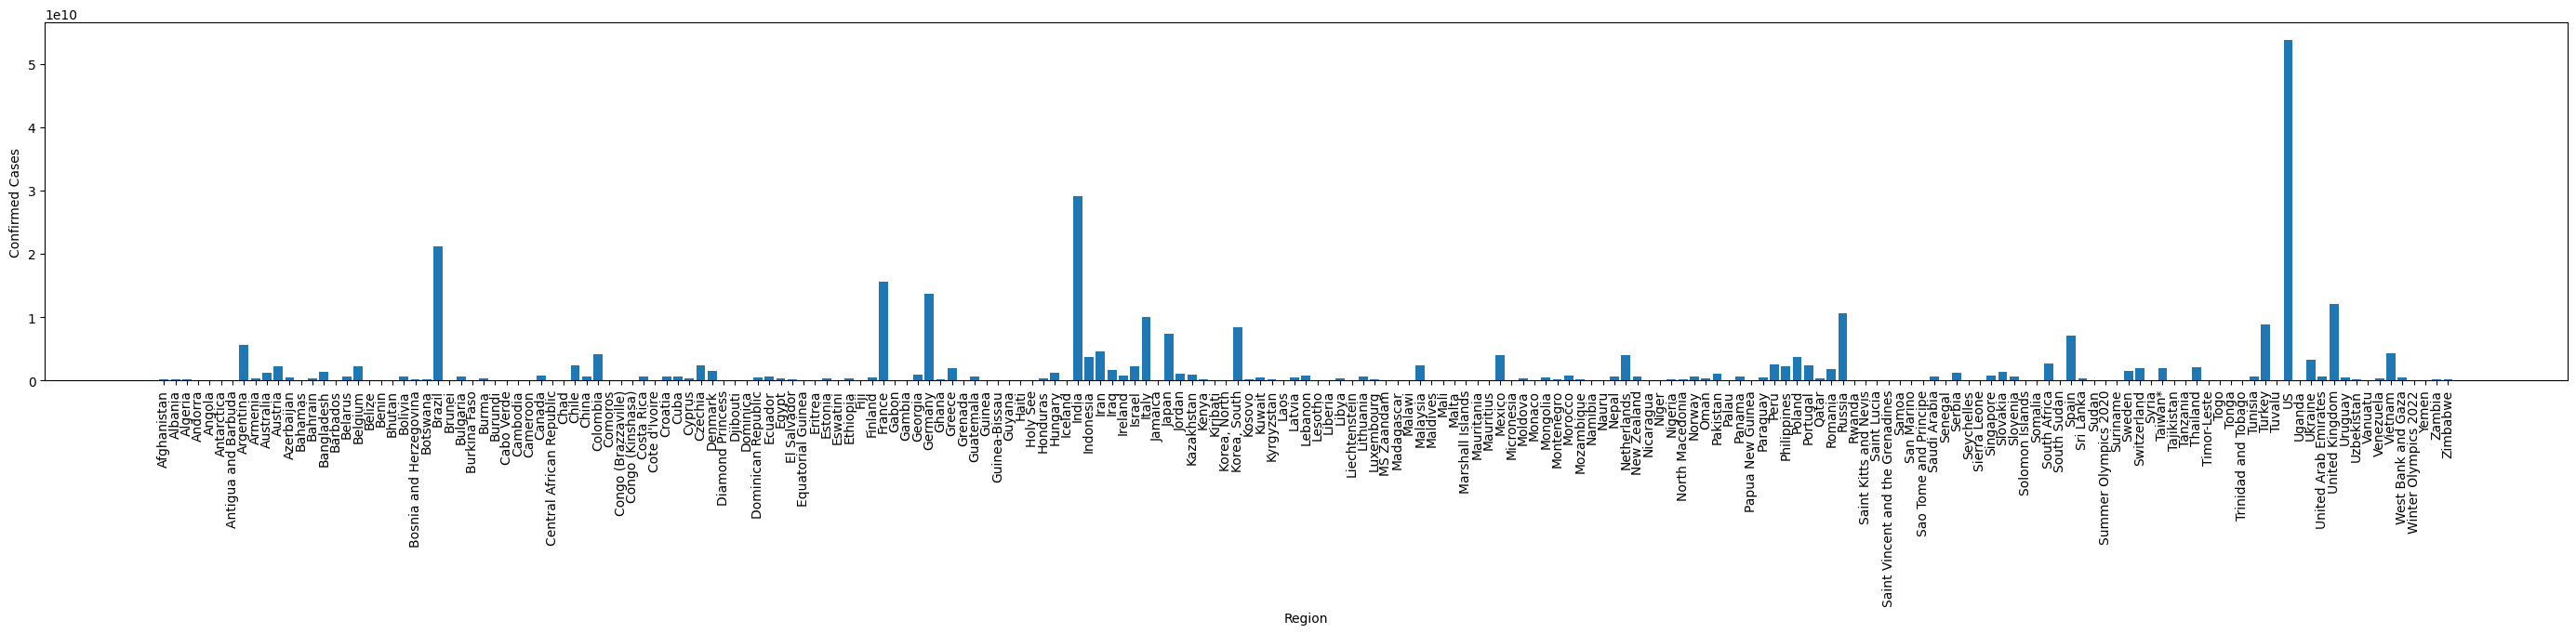

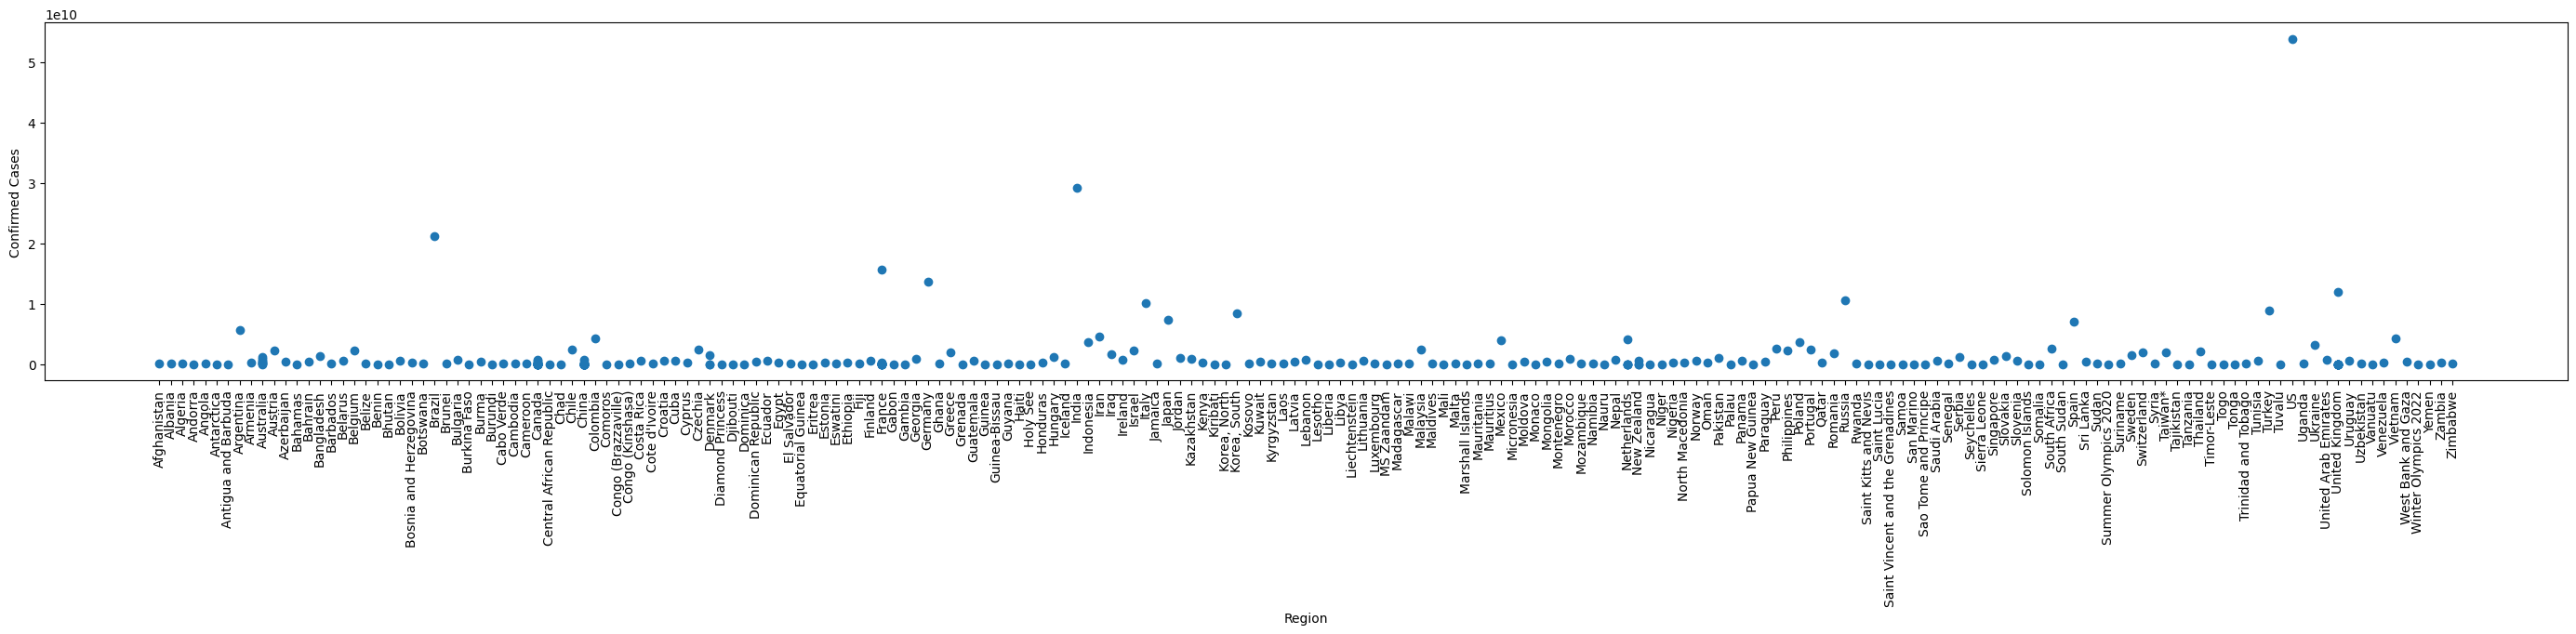

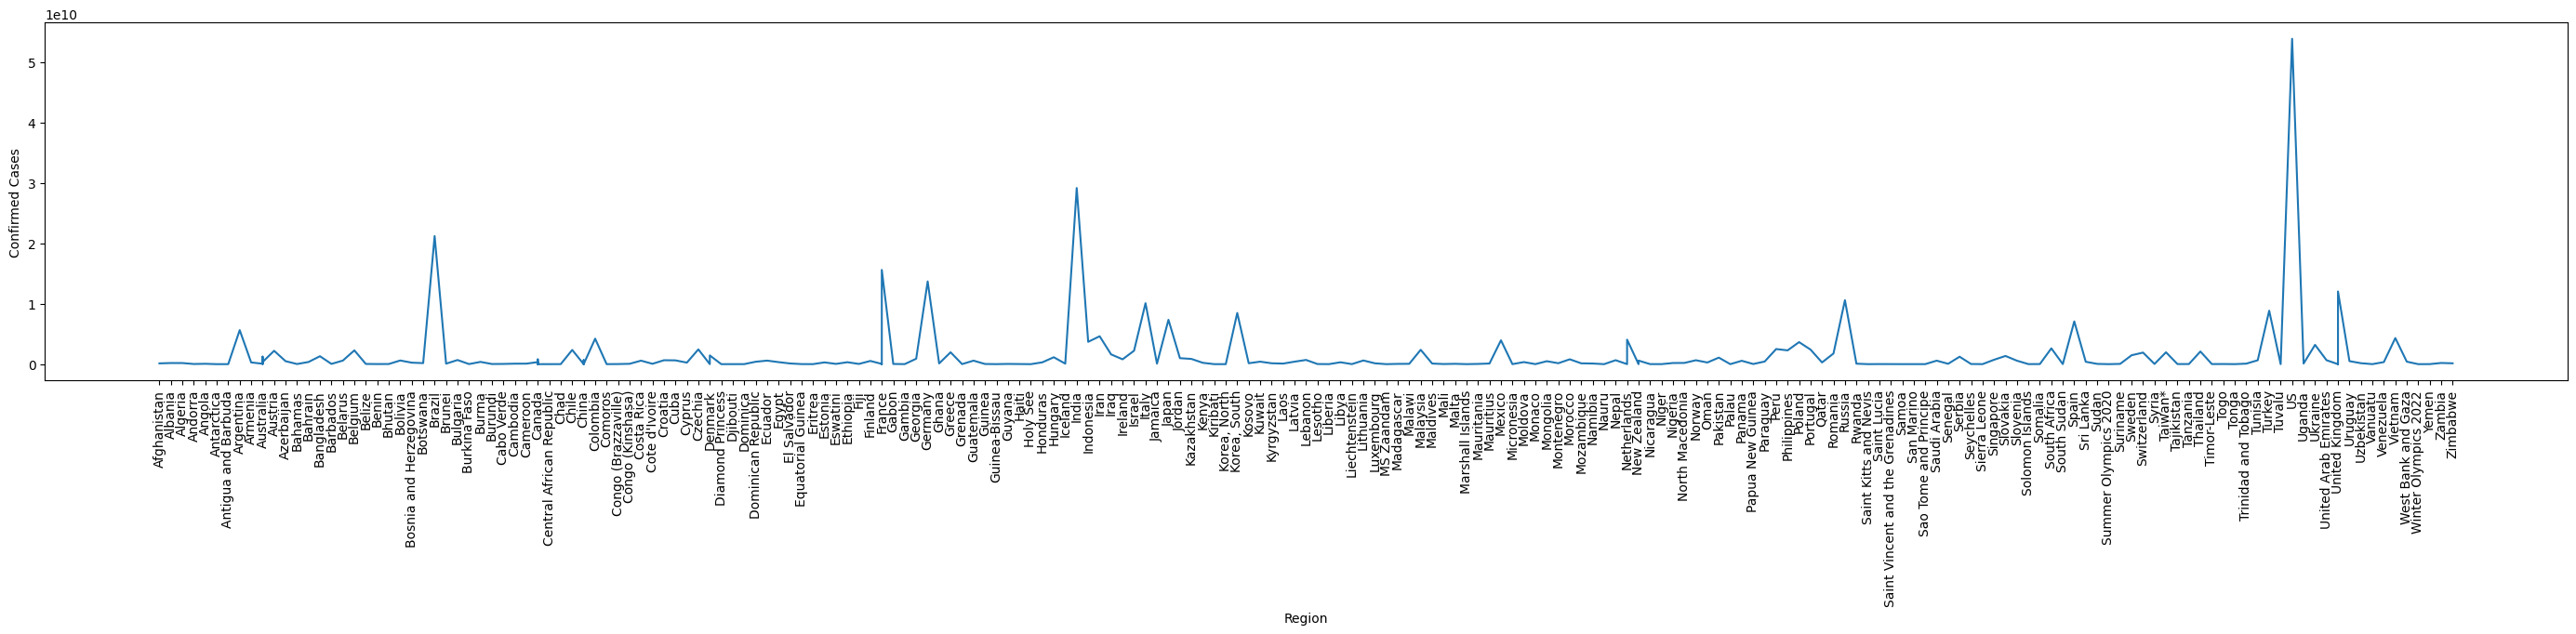

In [12]:
x = confirmed_df['Country/Region'].values
y = confirmed_df.iloc[:, 4:].sum(axis=1).values # Summing across all date columns for total confirmed cases

plt.figure(figsize=(35, 5))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.show()
plt.figure(figsize=(35, 5))
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.show()
plt.figure(figsize=(35, 5))
plt.plot(x, y)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.show()

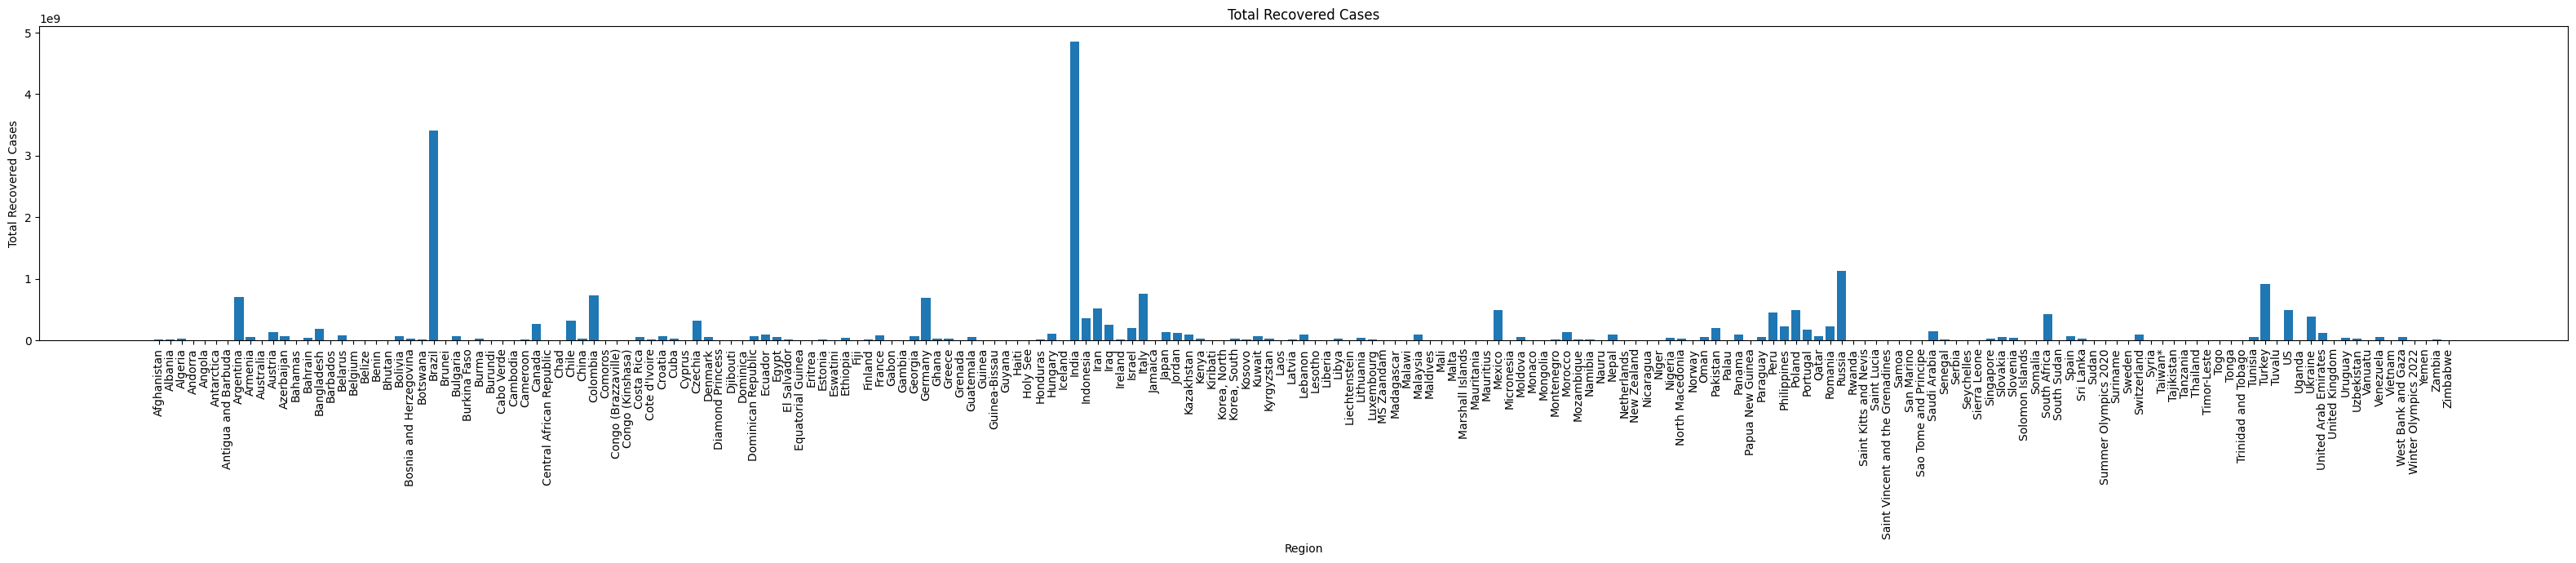

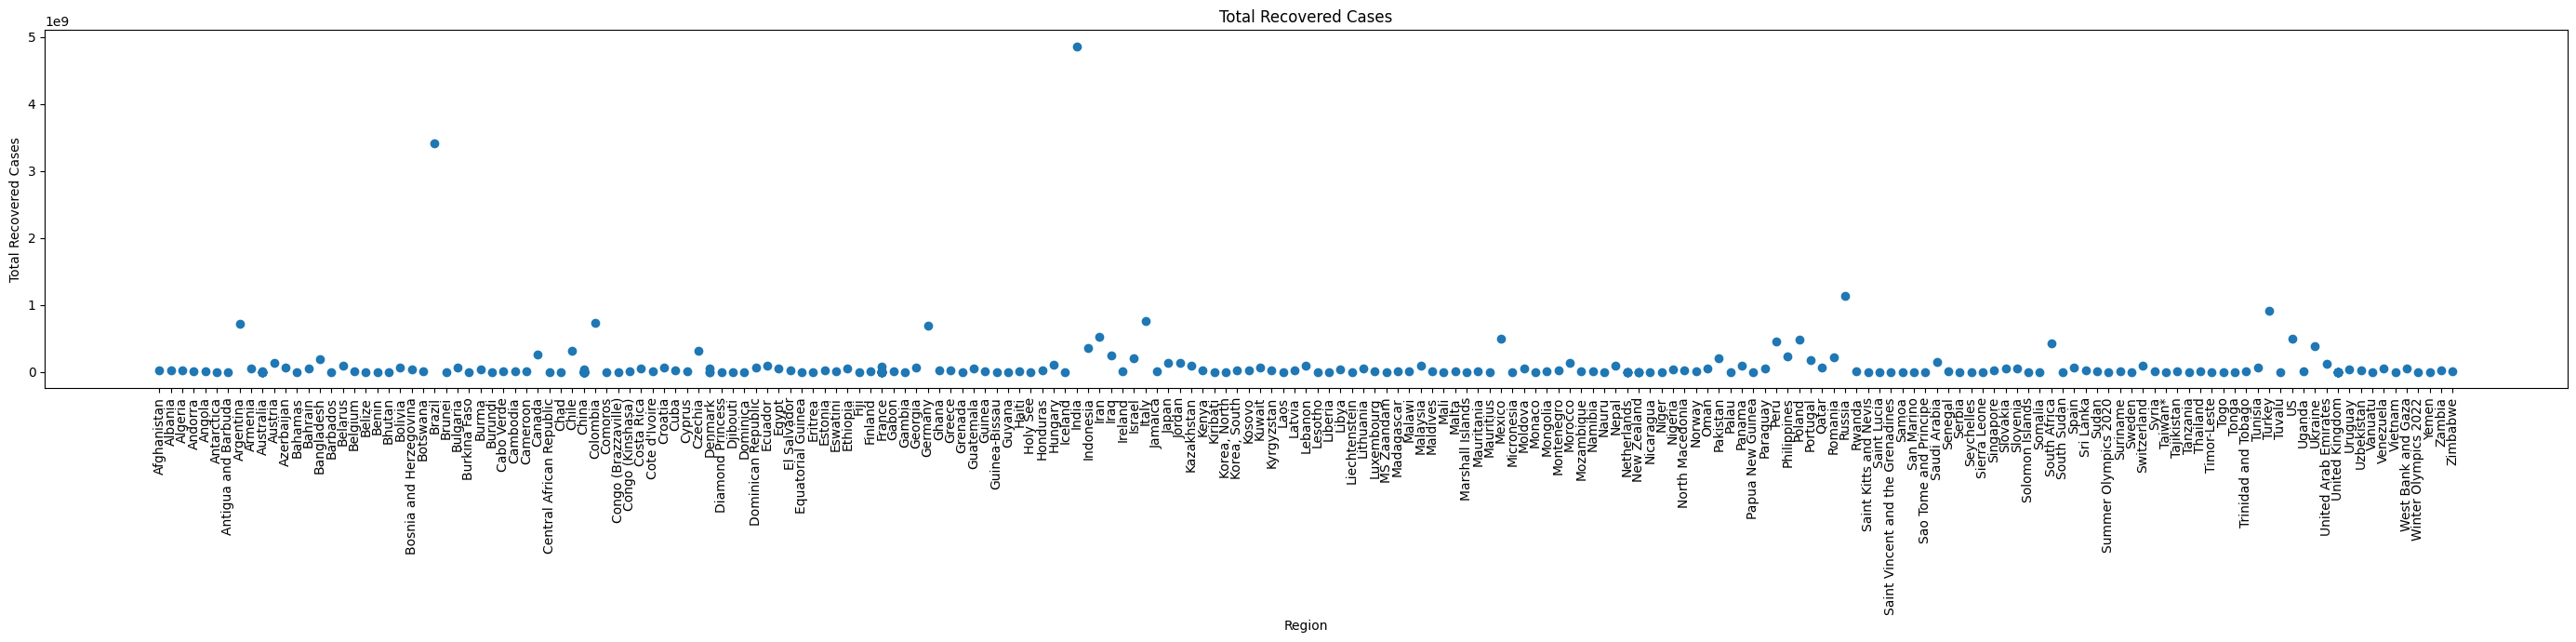

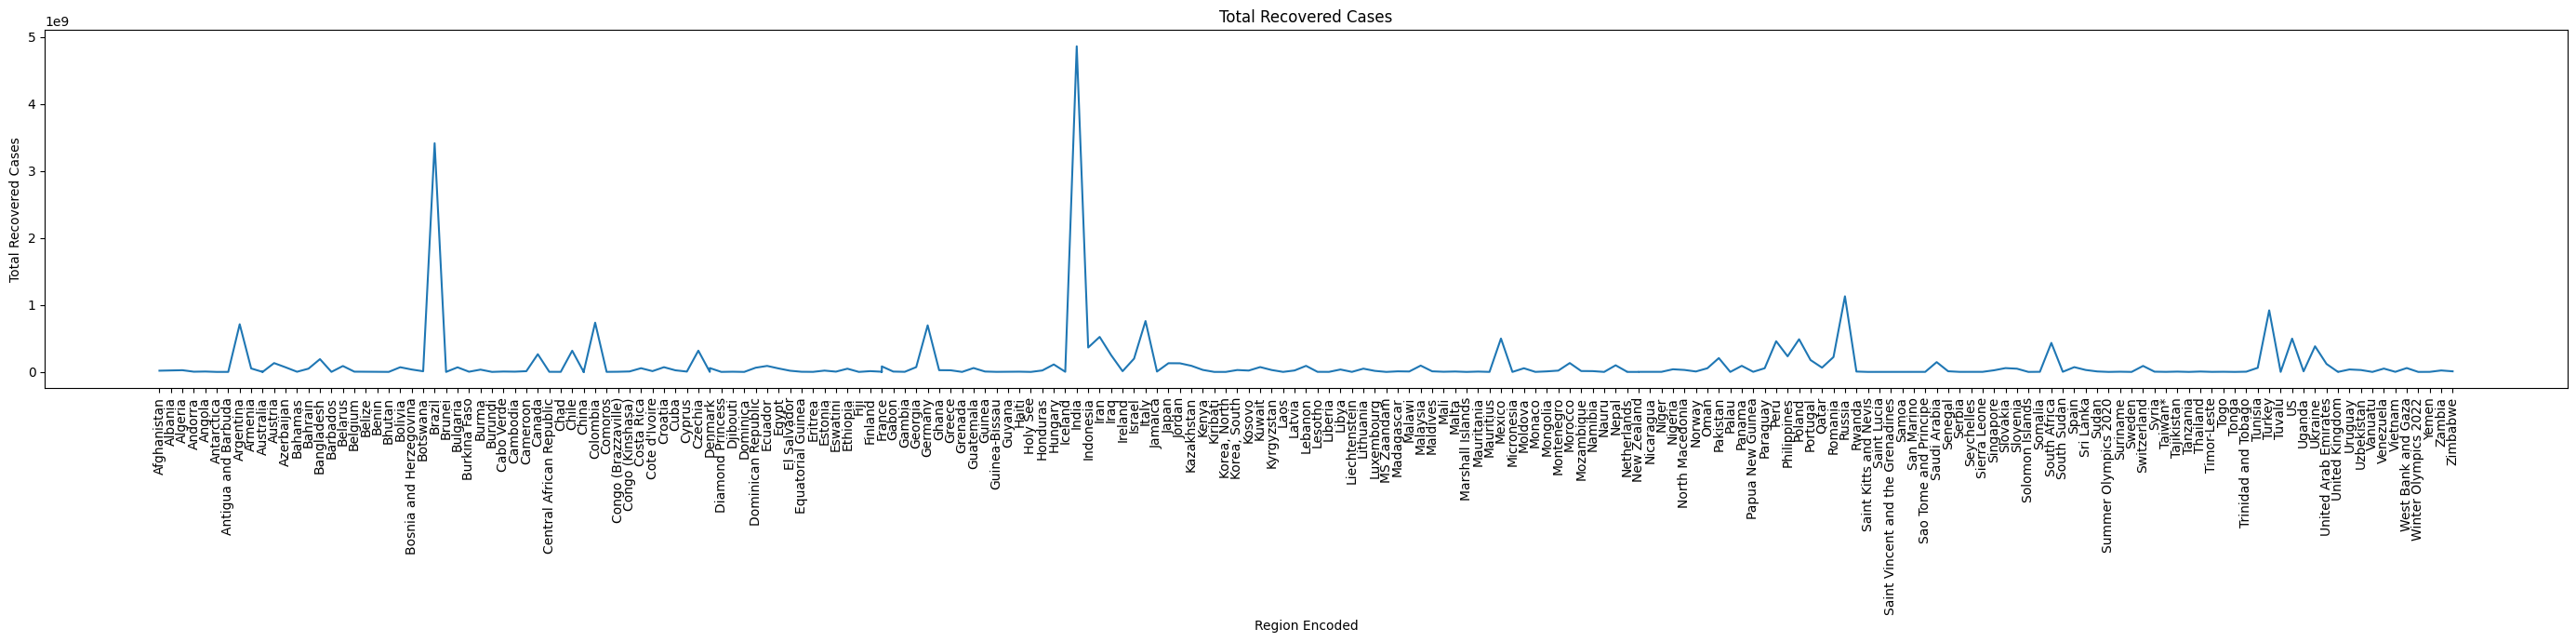

In [13]:
# recovered_df['Region Encoded'] = recovered_df['Country/Region'].map(countryRegion_map)

x = recovered_df['Country/Region'].values
y = recovered_df.iloc[:, 4:].sum(axis=1).values # Summing across all date columns for total recovered cases

plt.figure(figsize=(40, 5))
plt.bar(x, y)
plt.title('Total Recovered Cases')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Recovered Cases')
plt.show()


plt.figure(figsize=(35, 5))
plt.scatter(x,y)
plt.title('Total Recovered Cases')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Recovered Cases')
plt.show()


plt.figure(figsize=(35, 5))
plt.plot(x, y)
plt.title('Total Recovered Cases')
plt.xlabel('Region Encoded')
plt.xticks(rotation=90)
plt.ylabel('Total Recovered Cases')
plt.show()

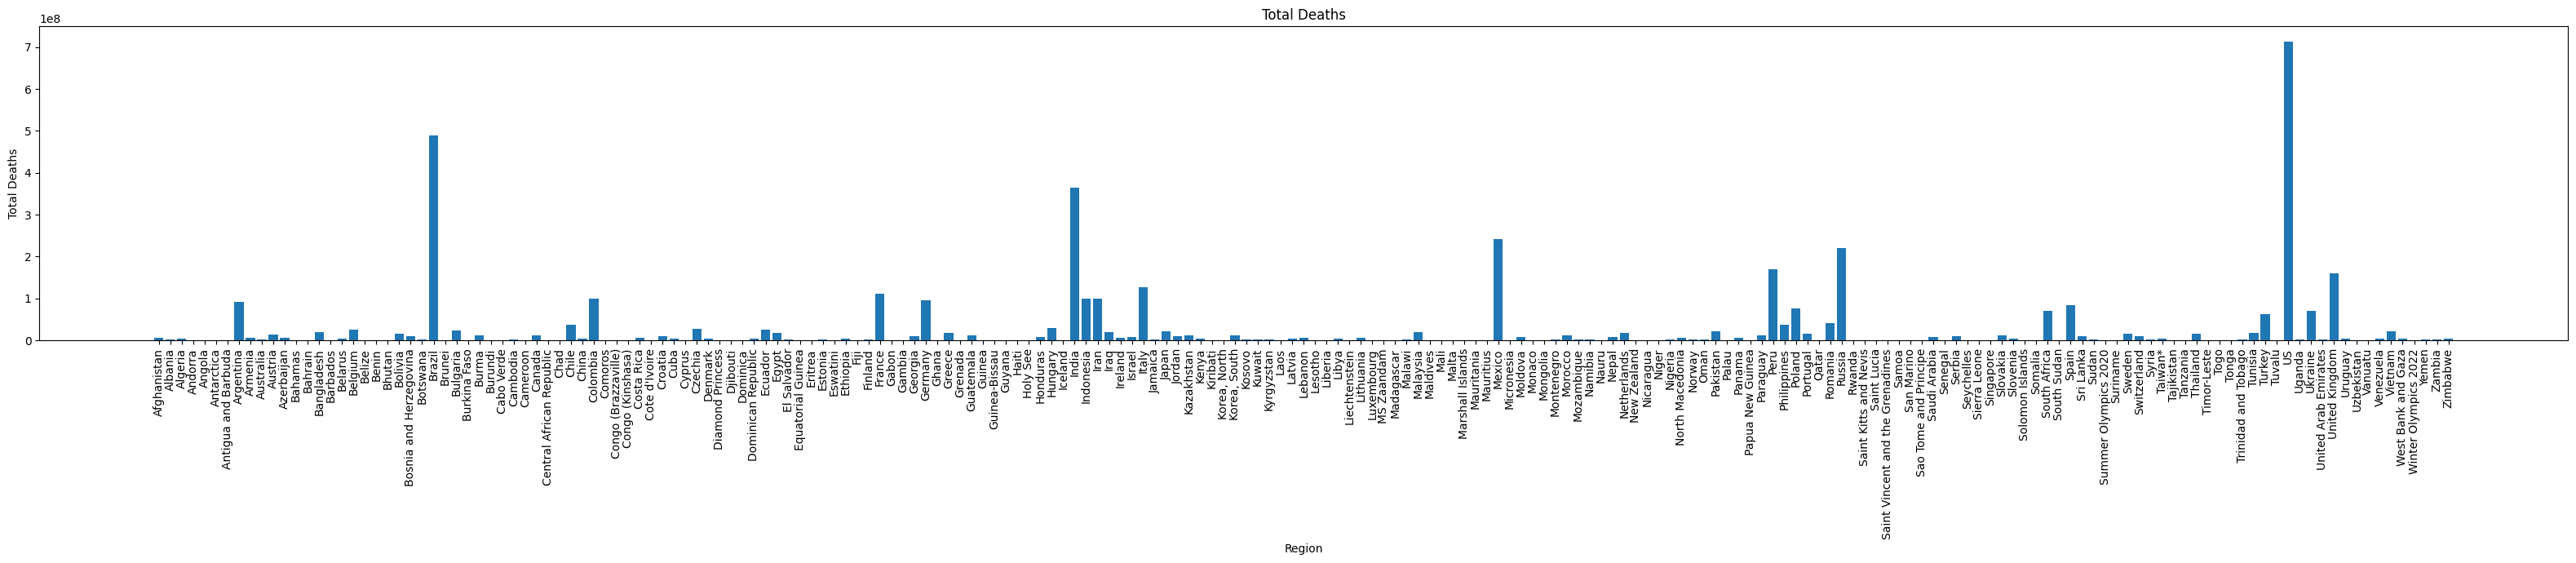

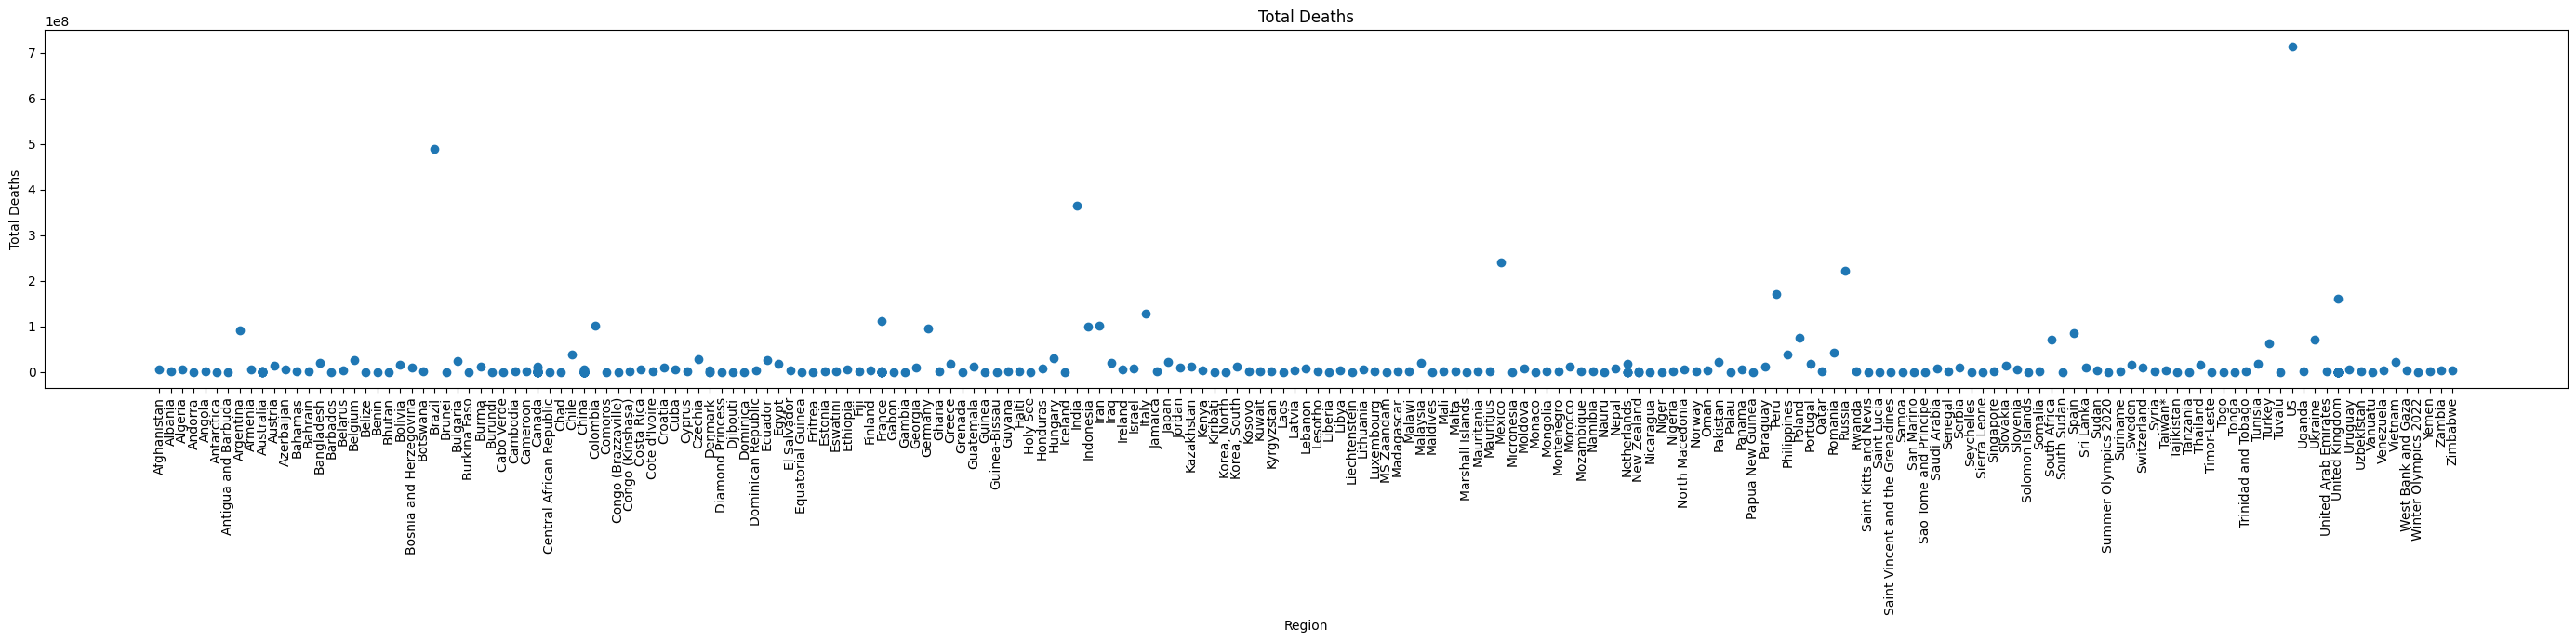

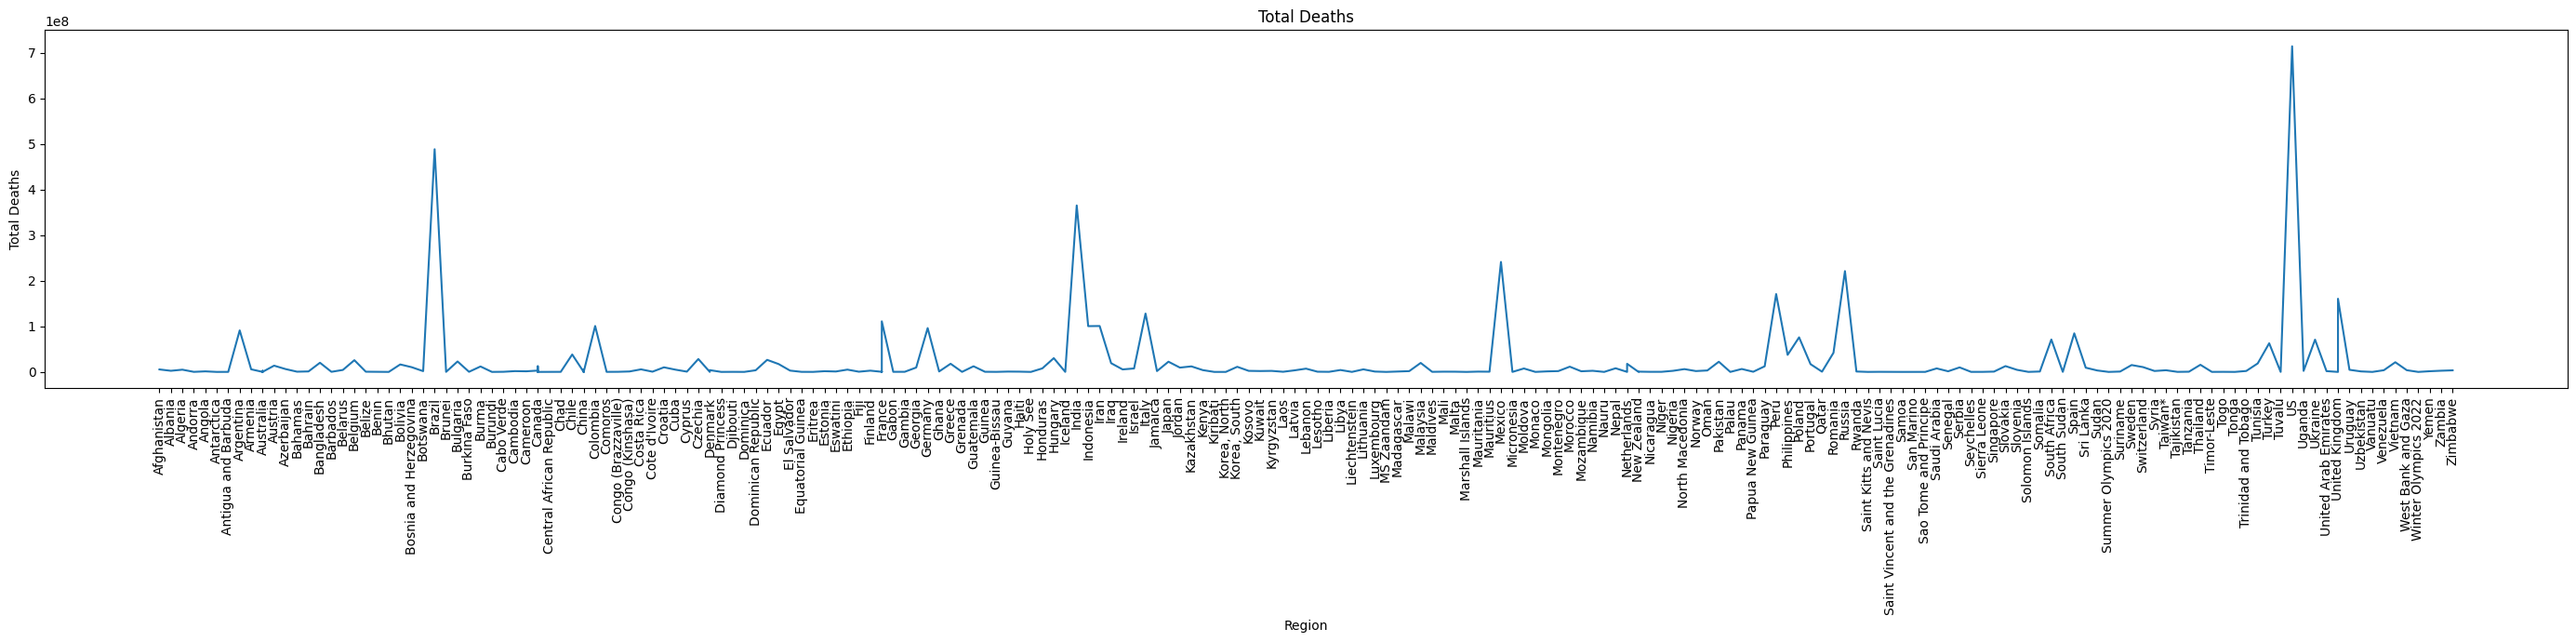

In [14]:
x = deaths_df['Country/Region'].values
y = deaths_df.iloc[:, 4:].sum(axis=1).values # Summing across all date columns for total deaths

plt.figure(figsize=(40, 5))
plt.bar(x, y)
plt.title('Total Deaths')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.show()


plt.figure(figsize=(35, 5))
plt.scatter(x,y)
plt.title('Total Deaths')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.show()


plt.figure(figsize=(35, 5))
plt.plot(x, y)
plt.title('Total Deaths')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Total Deaths')
plt.show()

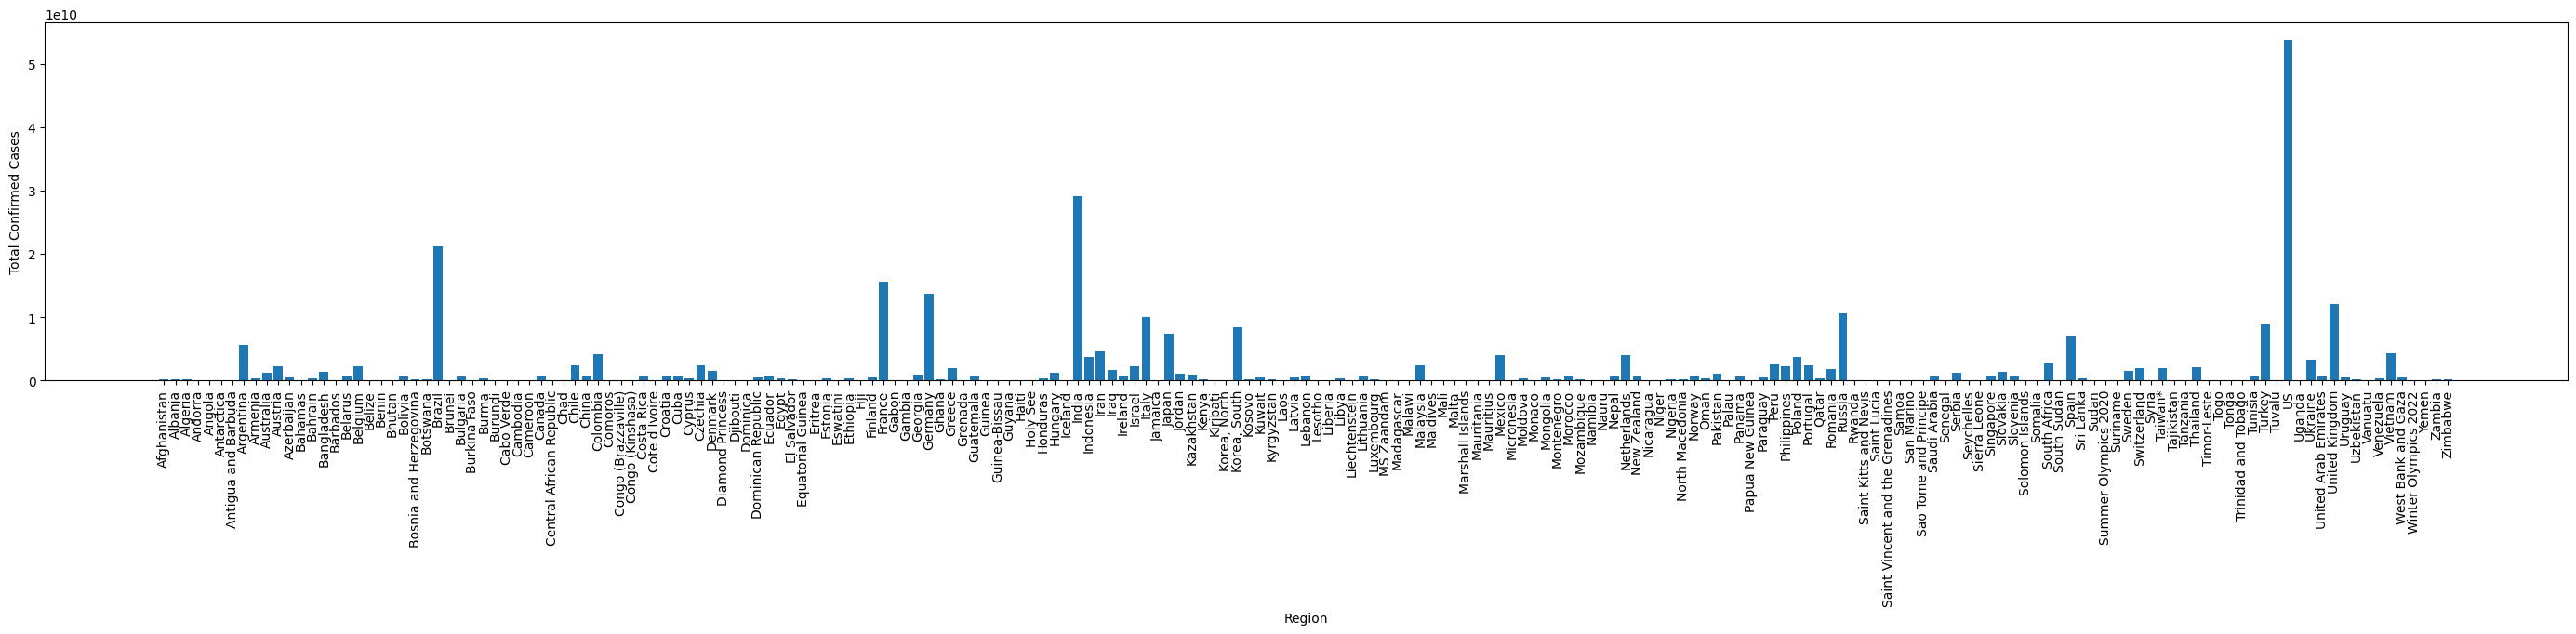

In [15]:
x = confirmed_df['Country/Region'].values
y = confirmed_df.iloc[:, 4:].sum(axis=1).values # Summing across all date columns for total confirmed cases

plt.figure(figsize=(35, 5))
plt.bar(x, y)
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Total Confirmed Cases')
plt.show()

In [16]:
url4 = 'https://raw.githubusercontent.com/govex/COVID-19/refs/heads/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'

gloabl_vaccine_df = pd.read_csv(url4, sep=',')
display(gloabl_vaccine_df)

UID iso2 iso3  code3  FIPS  Admin2  \
0        4   AF  AFG    4.0   NaN     NaN   
1        8   AL  ALB    8.0   NaN     NaN   
2       12   DZ  DZA   12.0   NaN     NaN   
3       20   AD  AND   20.0   NaN     NaN   
4       24   AO  AGO   24.0   NaN     NaN   
..     ...  ...  ...    ...   ...     ...   
211  82602  NaN  NaN    NaN   NaN     NaN   
212    654  NaN  NaN    NaN   NaN     NaN   
213  82603  NaN  NaN    NaN   NaN     NaN   
214    796  NaN  NaN    NaN   NaN     NaN   
215  82604  NaN  NaN    NaN   NaN     NaN   

                                   Province_State  Country_Region      Lat  \
0                                             NaN     Afghanistan  33.9391   
1                                             NaN         Albania  41.1533   
2                                             NaN         Algeria  28.0339   
3                                             NaN         Andorra  42.5063   
4                                             NaN          Angola -11.2027   
..                                            ...             ...      ...   
211                              Northern Ireland  United Kingdom      NaN   
212  Saint Helena, Ascension and Tristan da Cunha  United Kingdom      NaN   
213                                      Scotland  United Kingdom      NaN   
214                      Turks and Caicos Islands  United Kingdom      NaN   
215                                         Wales  United Kingdom      NaN   

       Long_  ...  2023-02-28  2023-03-01  2023-03-02  2023-03-03  2023-03-04  \
0    67.7100  ...  14743912.0  15093798.0  15093798.0  15093798.0  15093798.0   
1    20.1683  ...   3058102.0   3058102.0   3058102.0   3058102.0   3058102.0   
2     1.6596  ...  15267442.0  15267442.0  15267442.0  15267442.0  15267442.0   
3     1.5218  ...    156766.0    156766.0    156766.0    156766.0    156766.0   
4    17.8739  ...  24502287.0  24502287.0  24502287.0  24502287.0  24502287.0   
..       ...  ...         ...         ...         ...         ...         ...   
211      NaN  ...   4484169.0   4484281.0   4484330.0   4484330.0   4484330.0   
212      NaN  ...      7892.0      7892.0      7892.0      7892.0      7892.0   
213      NaN  ...  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0   
214      NaN  ...     73907.0     73907.0     73907.0     73907.0     73907.0   
215      NaN  ...   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0   

     2023-03-05  2023-03-06  2023-03-07  2023-03-08  2023-03-09  
0    15093798.0  15966423.0  15966423.0  15966423.0  15966423.0  
1     3058102.0   3058102.0   3058102.0   3058102.0   3058102.0  
2    15267442.0  15267442.0  15267442.0  15267442.0  15267442.0  
3      156766.0    156766.0    156766.0    156766.0    156766.0  
4    24502287.0  24502287.0  24502287.0  24502287.0  24502287.0  
..          ...         ...         ...         ...         ...  
211   4484330.0   4484330.0   4484330.0   4484330.0   4484330.0  
212      7892.0      7892.0      7892.0      7892.0      7892.0  
213  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0  
214     73907.0     73907.0     73907.0     73907.0     73907.0  
215   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0  

[216 rows x 813 columns]

In [17]:
gloabl_vaccine_df.describe()

UID       code3  FIPS  Admin2         Lat       Long_  \
count    216.000000  134.000000   0.0     0.0  134.000000  134.000000   
mean    1950.194444  424.380597   NaN     NaN   23.226463   12.228922   
std    11107.005094  250.456599   NaN     NaN   24.646518   59.531225   
min        4.000000    4.000000   NaN     NaN  -40.900600 -102.552800   
25%      213.500000  212.500000   NaN     NaN    8.479950  -15.095675   
50%      432.000000  425.000000   NaN     NaN   23.792950   16.673450   
75%      660.500000  645.250000   NaN     NaN   43.890125   43.285950   
max    82604.000000  862.000000   NaN     NaN   64.963100  174.886000   

         Population    2020-12-29    2020-12-30    2020-12-31  ...  \
count  1.340000e+02  2.600000e+01  2.800000e+01  3.200000e+01  ...   
mean   5.153937e+07  1.710084e+05  1.948380e+05  2.073654e+05  ...   
std    1.742244e+08  7.283076e+05  8.408469e+05  9.379917e+05  ...   
min    3.393800e+04  0.000000e+00  0.000000e+00  0.000000e+00  ...   
25%    2.878615e+06  6.775000e+02  1.418750e+03  1.847250e+03  ...   
50%    1.011922e+07  2.283000e+03  3.909000e+03  5.354500e+03  ...   
75%    3.638639e+07  8.497750e+03  1.569025e+04  2.467700e+04  ...   
max    1.404676e+09  3.706443e+06  4.435218e+06  5.283585e+06  ...   

         2023-02-28    2023-03-01    2023-03-02    2023-03-03    2023-03-04  \
count  2.160000e+02  2.160000e+02  2.160000e+02  2.160000e+02  2.160000e+02   
mean   6.235157e+07  6.239001e+07  6.239150e+07  6.239223e+07  6.240711e+07   
std    2.895696e+08  2.895718e+08  2.895731e+08  2.895738e+08  2.895721e+08   
min    4.407000e+03  4.407000e+03  4.407000e+03  4.407000e+03  4.407000e+03   
25%    8.348328e+05  8.348328e+05  8.348328e+05  8.348328e+05  8.348328e+05   
50%    6.607910e+06  6.607910e+06  6.607910e+06  6.607910e+06  6.607910e+06   
75%    2.536558e+07  2.536558e+07  2.536558e+07  2.536558e+07  2.536558e+07   
max    3.491077e+09  3.491077e+09  3.491077e+09  3.491077e+09  3.491077e+09   

         2023-03-05    2023-03-06    2023-03-07    2023-03-08    2023-03-09  
count  2.160000e+02  2.160000e+02  2.160000e+02  2.160000e+02  2.160000e+02  
mean   6.240782e+07  6.241261e+07  6.241299e+07  6.241402e+07  6.241431e+07  
std    2.895728e+08  2.895724e+08  2.895725e+08  2.895728e+08  2.895730e+08  
min    4.407000e+03  4.407000e+03  4.407000e+03  4.407000e+03  4.407000e+03  
25%    8.348328e+05  8.348328e+05  8.348328e+05  8.348328e+05  8.348328e+05  
50%    6.607910e+06  6.607910e+06  6.607910e+06  6.607910e+06  6.607910e+06  
75%    2.536558e+07  2.536558e+07  2.536558e+07  2.536558e+07  2.536558e+07  
max    3.491077e+09  3.491077e+09  3.491077e+09  3.491077e+09  3.491077e+09  

[8 rows x 808 columns]

In [18]:
gloabl_vaccine_df.info(220)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 813 columns):
 #    Column          Dtype  
---   ------          -----  
 0    UID             int64  
 1    iso2            object 
 2    iso3            object 
 3    code3           float64
 4    FIPS            float64
 5    Admin2          float64
 6    Province_State  object 
 7    Country_Region  object 
 8    Lat             float64
 9    Long_           float64
 10   Combined_Key    object 
 11   Population      float64
 12   2020-12-29      float64
 13   2020-12-30      float64
 14   2020-12-31      float64
 15   2021-01-01      float64
 16   2021-01-02      float64
 17   2021-01-03      float64
 18   2021-01-04      float64
 19   2021-01-05      float64
 20   2021-01-06      float64
 21   2021-01-07      float64
 22   2021-01-08      float64
 23   2021-01-09      float64
 24   2021-01-10      float64
 25   2021-01-11      float64
 26   2021-01-12      float64
 27   2021-01-13      fl

In [19]:
print(gloabl_vaccine_df.columns)

display(gloabl_vaccine_df)

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
       '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09'],
      dtype='object', length=813)


UID iso2 iso3  code3  FIPS  Admin2  \
0        4   AF  AFG    4.0   NaN     NaN   
1        8   AL  ALB    8.0   NaN     NaN   
2       12   DZ  DZA   12.0   NaN     NaN   
3       20   AD  AND   20.0   NaN     NaN   
4       24   AO  AGO   24.0   NaN     NaN   
..     ...  ...  ...    ...   ...     ...   
211  82602  NaN  NaN    NaN   NaN     NaN   
212    654  NaN  NaN    NaN   NaN     NaN   
213  82603  NaN  NaN    NaN   NaN     NaN   
214    796  NaN  NaN    NaN   NaN     NaN   
215  82604  NaN  NaN    NaN   NaN     NaN   

                                   Province_State  Country_Region      Lat  \
0                                             NaN     Afghanistan  33.9391   
1                                             NaN         Albania  41.1533   
2                                             NaN         Algeria  28.0339   
3                                             NaN         Andorra  42.5063   
4                                             NaN          Angola -11.2027   
..                                            ...             ...      ...   
211                              Northern Ireland  United Kingdom      NaN   
212  Saint Helena, Ascension and Tristan da Cunha  United Kingdom      NaN   
213                                      Scotland  United Kingdom      NaN   
214                      Turks and Caicos Islands  United Kingdom      NaN   
215                                         Wales  United Kingdom      NaN   

       Long_  ...  2023-02-28  2023-03-01  2023-03-02  2023-03-03  2023-03-04  \
0    67.7100  ...  14743912.0  15093798.0  15093798.0  15093798.0  15093798.0   
1    20.1683  ...   3058102.0   3058102.0   3058102.0   3058102.0   3058102.0   
2     1.6596  ...  15267442.0  15267442.0  15267442.0  15267442.0  15267442.0   
3     1.5218  ...    156766.0    156766.0    156766.0    156766.0    156766.0   
4    17.8739  ...  24502287.0  24502287.0  24502287.0  24502287.0  24502287.0   
..       ...  ...         ...         ...         ...         ...         ...   
211      NaN  ...   4484169.0   4484281.0   4484330.0   4484330.0   4484330.0   
212      NaN  ...      7892.0      7892.0      7892.0      7892.0      7892.0   
213      NaN  ...  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0   
214      NaN  ...     73907.0     73907.0     73907.0     73907.0     73907.0   
215      NaN  ...   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0   

     2023-03-05  2023-03-06  2023-03-07  2023-03-08  2023-03-09  
0    15093798.0  15966423.0  15966423.0  15966423.0  15966423.0  
1     3058102.0   3058102.0   3058102.0   3058102.0   3058102.0  
2    15267442.0  15267442.0  15267442.0  15267442.0  15267442.0  
3      156766.0    156766.0    156766.0    156766.0    156766.0  
4    24502287.0  24502287.0  24502287.0  24502287.0  24502287.0  
..          ...         ...         ...         ...         ...  
211   4484330.0   4484330.0   4484330.0   4484330.0   4484330.0  
212      7892.0      7892.0      7892.0      7892.0      7892.0  
213  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0  
214     73907.0     73907.0     73907.0     73907.0     73907.0  
215   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0  

[216 rows x 813 columns]

In [20]:
gloabl_vaccine_df.isnull().sum()

UID             0
iso2           83
iso3           82
code3          82
FIPS          216
             ... 
2023-03-05      0
2023-03-06      0
2023-03-07      0
2023-03-08      0
2023-03-09      0
Length: 813, dtype: int64

In [21]:
gloabl_vaccine_df.fillna(0, inplace=True)
display(gloabl_vaccine_df.isnull().sum())

display(gloabl_vaccine_df)

UID           0
iso2          0
iso3          0
code3         0
FIPS          0
             ..
2023-03-05    0
2023-03-06    0
2023-03-07    0
2023-03-08    0
2023-03-09    0
Length: 813, dtype: int64

UID iso2 iso3  code3  FIPS  Admin2  \
0        4   AF  AFG    4.0   0.0     0.0   
1        8   AL  ALB    8.0   0.0     0.0   
2       12   DZ  DZA   12.0   0.0     0.0   
3       20   AD  AND   20.0   0.0     0.0   
4       24   AO  AGO   24.0   0.0     0.0   
..     ...  ...  ...    ...   ...     ...   
211  82602    0    0    0.0   0.0     0.0   
212    654    0    0    0.0   0.0     0.0   
213  82603    0    0    0.0   0.0     0.0   
214    796    0    0    0.0   0.0     0.0   
215  82604    0    0    0.0   0.0     0.0   

                                   Province_State  Country_Region      Lat  \
0                                               0     Afghanistan  33.9391   
1                                               0         Albania  41.1533   
2                                               0         Algeria  28.0339   
3                                               0         Andorra  42.5063   
4                                               0          Angola -11.2027   
..                                            ...             ...      ...   
211                              Northern Ireland  United Kingdom   0.0000   
212  Saint Helena, Ascension and Tristan da Cunha  United Kingdom   0.0000   
213                                      Scotland  United Kingdom   0.0000   
214                      Turks and Caicos Islands  United Kingdom   0.0000   
215                                         Wales  United Kingdom   0.0000   

       Long_  ...  2023-02-28  2023-03-01  2023-03-02  2023-03-03  2023-03-04  \
0    67.7100  ...  14743912.0  15093798.0  15093798.0  15093798.0  15093798.0   
1    20.1683  ...   3058102.0   3058102.0   3058102.0   3058102.0   3058102.0   
2     1.6596  ...  15267442.0  15267442.0  15267442.0  15267442.0  15267442.0   
3     1.5218  ...    156766.0    156766.0    156766.0    156766.0    156766.0   
4    17.8739  ...  24502287.0  24502287.0  24502287.0  24502287.0  24502287.0   
..       ...  ...         ...         ...         ...         ...         ...   
211   0.0000  ...   4484169.0   4484281.0   4484330.0   4484330.0   4484330.0   
212   0.0000  ...      7892.0      7892.0      7892.0      7892.0      7892.0   
213   0.0000  ...  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0   
214   0.0000  ...     73907.0     73907.0     73907.0     73907.0     73907.0   
215   0.0000  ...   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0   

     2023-03-05  2023-03-06  2023-03-07  2023-03-08  2023-03-09  
0    15093798.0  15966423.0  15966423.0  15966423.0  15966423.0  
1     3058102.0   3058102.0   3058102.0   3058102.0   3058102.0  
2    15267442.0  15267442.0  15267442.0  15267442.0  15267442.0  
3      156766.0    156766.0    156766.0    156766.0    156766.0  
4    24502287.0  24502287.0  24502287.0  24502287.0  24502287.0  
..          ...         ...         ...         ...         ...  
211   4484330.0   4484330.0   4484330.0   4484330.0   4484330.0  
212      7892.0      7892.0      7892.0      7892.0      7892.0  
213  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0  
214     73907.0     73907.0     73907.0     73907.0     73907.0  
215   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0  

[216 rows x 813 columns]

In [22]:
new_global_vaccine_df = gloabl_vaccine_df.drop(['Long_', 'Province_State'], axis=1)

display(new_global_vaccine_df)

# Select only numerical columns before summing
cleaned_gloabl_vaccine_df = new_global_vaccine_df.groupby('Country_Region').sum(numeric_only=True)

print(cleaned_gloabl_vaccine_df)

UID iso2 iso3  code3  FIPS  Admin2  Country_Region      Lat  \
0        4   AF  AFG    4.0   0.0     0.0     Afghanistan  33.9391   
1        8   AL  ALB    8.0   0.0     0.0         Albania  41.1533   
2       12   DZ  DZA   12.0   0.0     0.0         Algeria  28.0339   
3       20   AD  AND   20.0   0.0     0.0         Andorra  42.5063   
4       24   AO  AGO   24.0   0.0     0.0          Angola -11.2027   
..     ...  ...  ...    ...   ...     ...             ...      ...   
211  82602    0    0    0.0   0.0     0.0  United Kingdom   0.0000   
212    654    0    0    0.0   0.0     0.0  United Kingdom   0.0000   
213  82603    0    0    0.0   0.0     0.0  United Kingdom   0.0000   
214    796    0    0    0.0   0.0     0.0  United Kingdom   0.0000   
215  82604    0    0    0.0   0.0     0.0  United Kingdom   0.0000   

    Combined_Key  Population  ...  2023-02-28  2023-03-01  2023-03-02  \
0    Afghanistan  38928341.0  ...  14743912.0  15093798.0  15093798.0   
1        Albania   2877800.0  ...   3058102.0   3058102.0   3058102.0   
2        Algeria  43851043.0  ...  15267442.0  15267442.0  15267442.0   
3        Andorra     77265.0  ...    156766.0    156766.0    156766.0   
4         Angola  32866268.0  ...  24502287.0  24502287.0  24502287.0   
..           ...         ...  ...         ...         ...         ...   
211            0         0.0  ...   4484169.0   4484281.0   4484330.0   
212            0         0.0  ...      7892.0      7892.0      7892.0   
213            0         0.0  ...  13014285.0  13014285.0  13014285.0   
214            0         0.0  ...     73907.0     73907.0     73907.0   
215            0         0.0  ...   8618742.0   8618742.0   8618742.0   

     2023-03-03  2023-03-04  2023-03-05  2023-03-06  2023-03-07  2023-03-08  \
0    15093798.0  15093798.0  15093798.0  15966423.0  15966423.0  15966423.0   
1     3058102.0   3058102.0   3058102.0   3058102.0   3058102.0   3058102.0   
2    15267442.0  15267442.0  15267442.0  15267442.0  15267442.0  15267442.0   
3      156766.0    156766.0    156766.0    156766.0    156766.0    156766.0   
4    24502287.0  24502287.0  24502287.0  24502287.0  24502287.0  24502287.0   
..          ...         ...         ...         ...         ...         ...   
211   4484330.0   4484330.0   4484330.0   4484330.0   4484330.0   4484330.0   
212      7892.0      7892.0      7892.0      7892.0      7892.0      7892.0   
213  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0  13014285.0   
214     73907.0     73907.0     73907.0     73907.0     73907.0     73907.0   
215   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0   8618742.0   

     2023-03-09  
0    15966423.0  
1     3058102.0  
2    15267442.0  
3      156766.0  
4    24502287.0  
..          ...  
211   4484330.0  
212      7892.0  
213  13014285.0  
214     73907.0  
215   8618742.0  

[216 rows x 811 columns]

                    UID  code3  FIPS  Admin2      Lat  Population  2020-12-29  \
Country_Region                                                                  
Afghanistan           4    4.0   0.0     0.0  33.9391  38928341.0         0.0   
Albania               8    8.0   0.0     0.0  41.1533   2877800.0         0.0   
Algeria              12   12.0   0.0     0.0  28.0339  43851043.0         0.0   
Andorra              20   20.0   0.0     0.0  42.5063     77265.0         0.0   
Angola               24   24.0   0.0     0.0 -11.2027  32866268.0         0.0   
...                 ...    ...   ...     ...      ...         ...         ...   
Vietnam             704  704.0   0.0     0.0  14.0583  97338583.0         0.0   
West Bank and Gaza  275    0.0   0.0     0.0   0.0000         0.0         0.0   
Yemen               887    0.0   0.0     0.0   0.0000         0.0         0.0   
Zambia              894    0.0   0.0     0.0   0.0000         0.0         0.0   
Zimbabwe            716  716

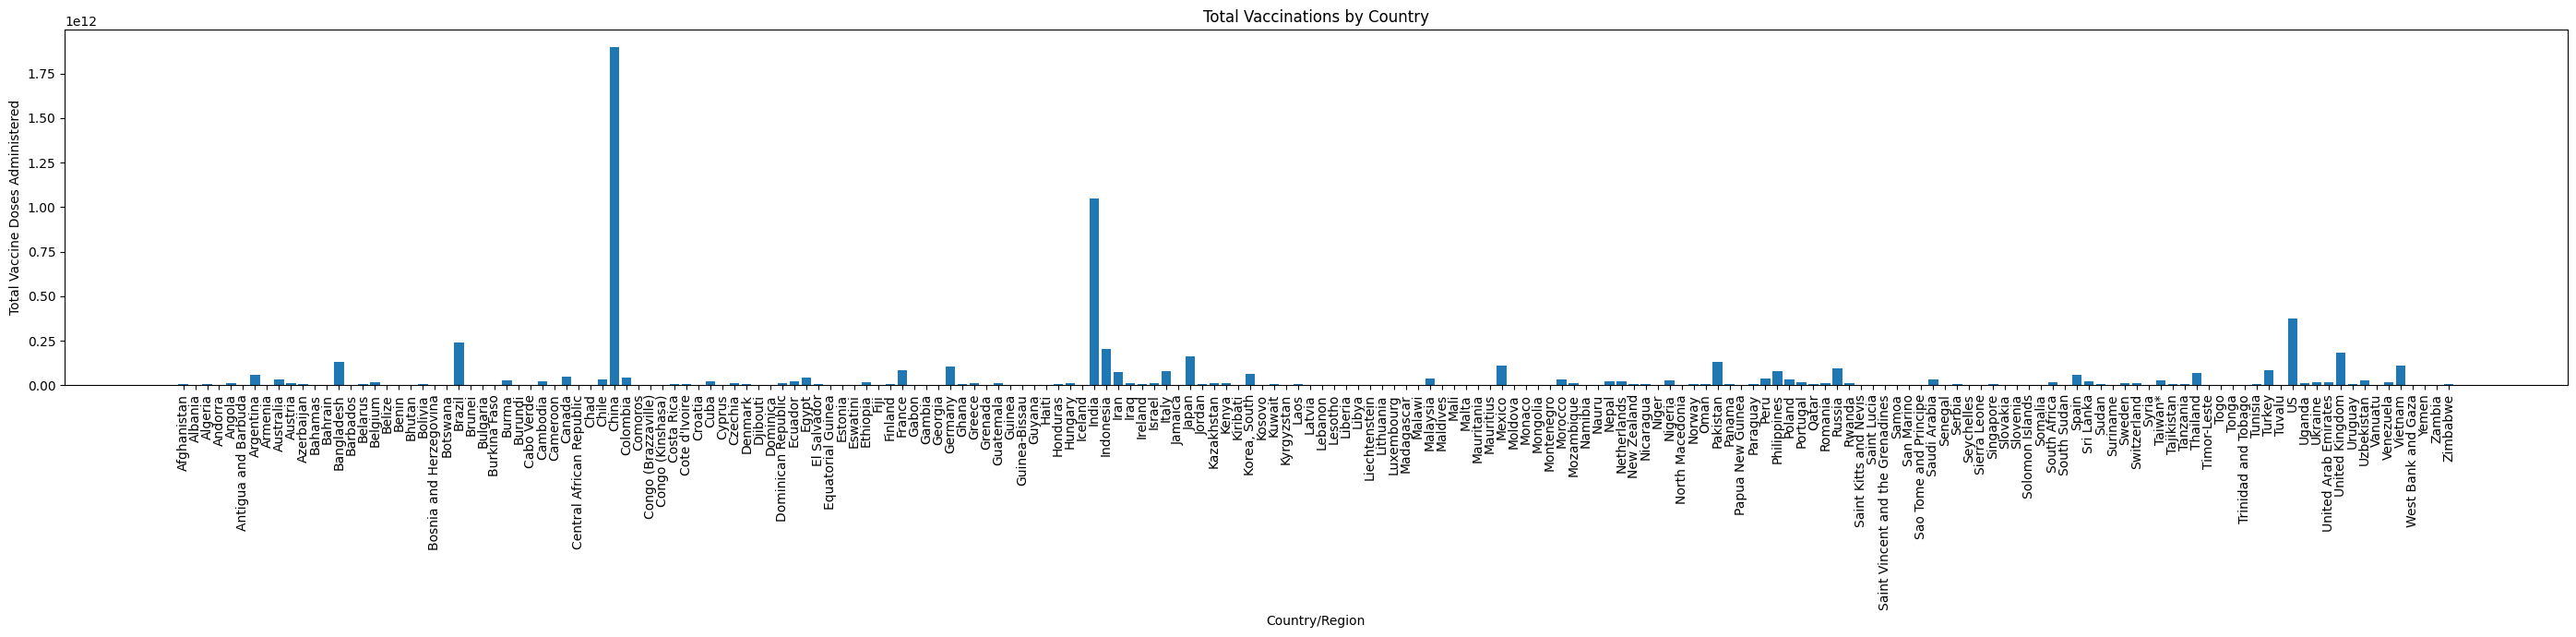

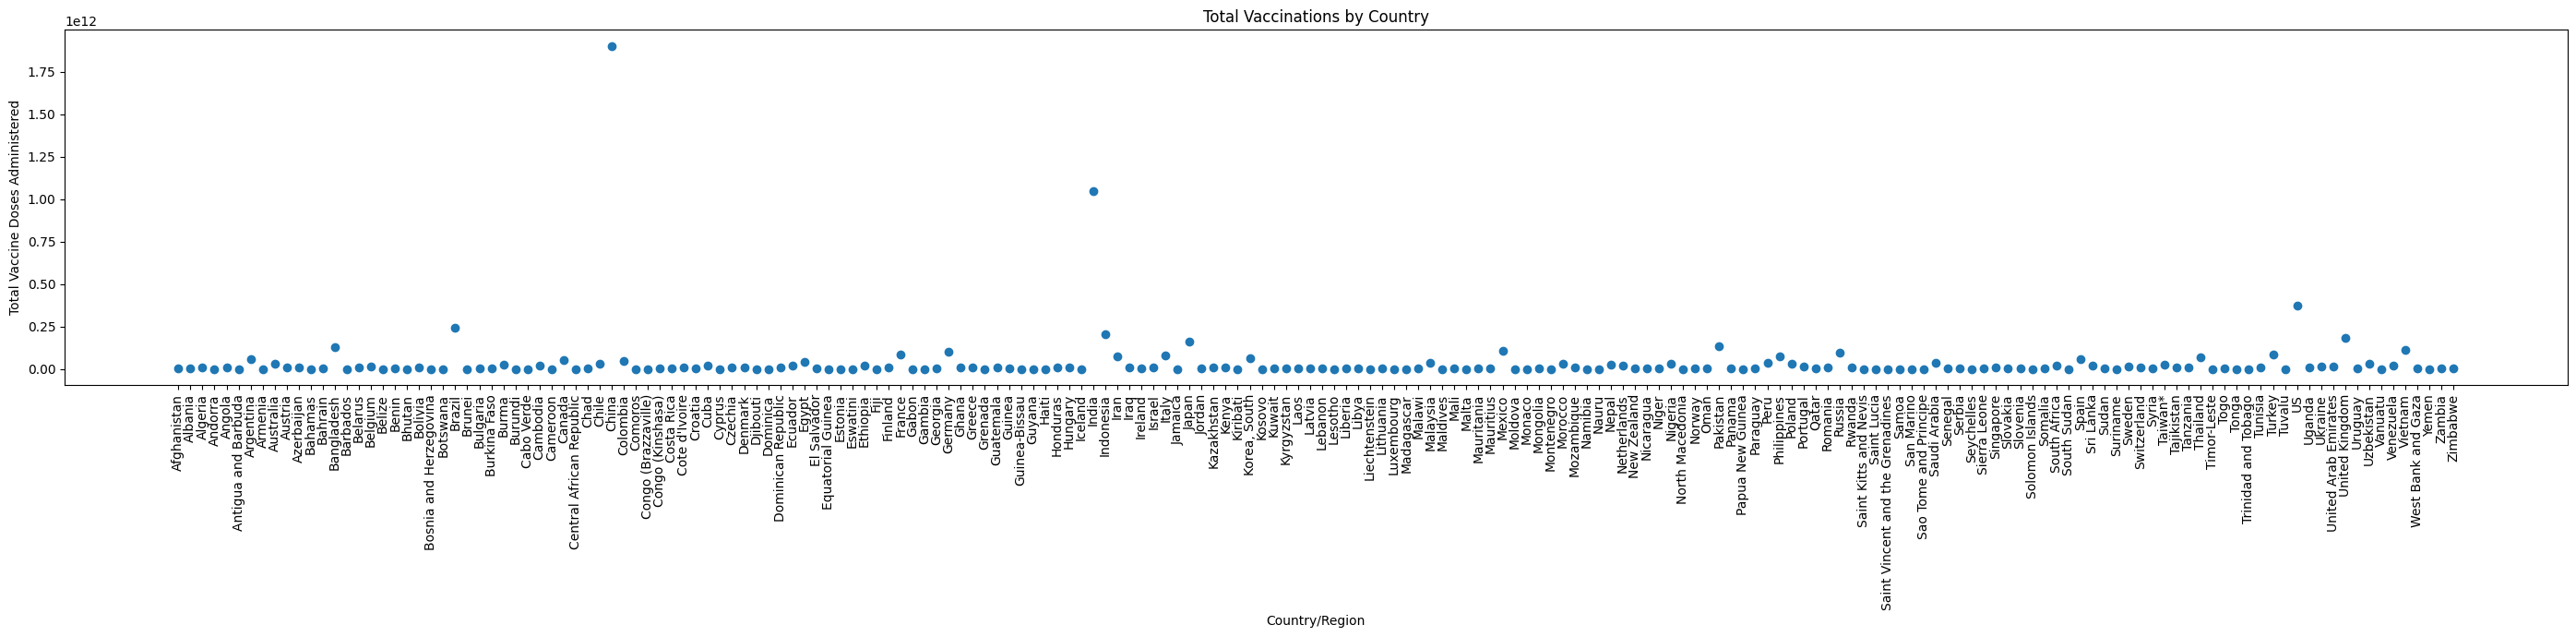

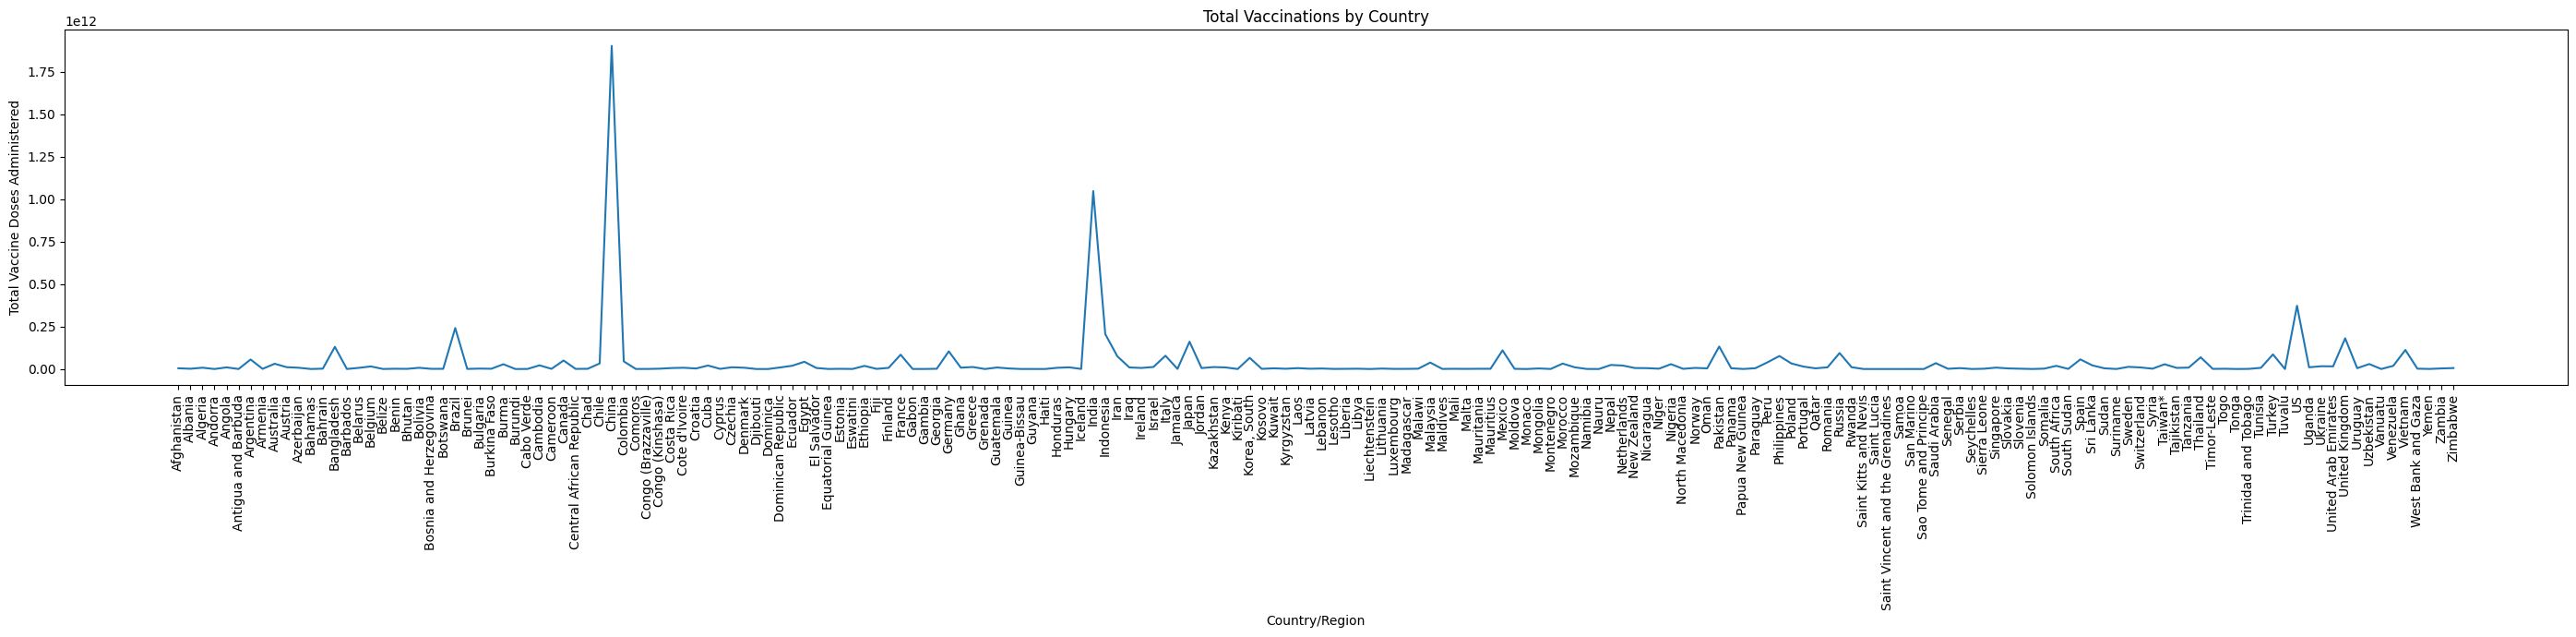

In [23]:
x = cleaned_gloabl_vaccine_df.index
y = cleaned_gloabl_vaccine_df.select_dtypes(include=np.number).sum(axis=1).values

plt.figure(figsize=(35, 5))
plt.bar(x, y)
plt.title('Total Vaccinations by Country')
plt.xlabel('Country/Region')
plt.xticks(rotation=90)
plt.ylabel('Total Vaccine Doses Administered')
plt.show()

plt.figure(figsize=(35, 5))
plt.scatter(x, y)
plt.title('Total Vaccinations by Country')
plt.xlabel('Country/Region')
plt.xticks(rotation=90)
plt.ylabel('Total Vaccine Doses Administered')
plt.show()

plt.figure(figsize=(35, 5))
plt.plot(x, y)
plt.title('Total Vaccinations by Country')
plt.xlabel('Country/Region')
plt.xticks(rotation=90)
plt.ylabel('Total Vaccine Doses Administered')
plt.show()

In [24]:
cleaned_gloabl_vaccine_df = cleaned_gloabl_vaccine_df.describe()

display(cleaned_confirmed_df)

cleaned_gloabl_vaccine_df.dropna(inplace=True)

display(cleaned_gloabl_vaccine_df)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                   0        2        2        2        2        2   
West Bank and Gaza        0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...    3/1/23  \
Country/Region                                          ...             
Afghanistan               0        0        0        0  ...    209340   
Albania                   0        0        0        0  ...    334408   
Algeria                   0        0        0        0  ...    271448   
Andorra                   0        0        0        0  ...     47875   
Angola                    0        0        0        0  ...    105277   
...                     ...      ...      ...      ...  ...       ...   
Vietnam                   2        2        2        2  ...  11526926   
West Bank and Gaza        0        0        0        0  ...    703228   
Yemen                     0        0        0        0  ...     11945   
Zambia                    0        0        0        0  ...    343012   
Zimbabwe                  0        0        0        0  ...    264127   

                      3/2/23    3/3/23    3/4/23    3/5/23    3/6/23  \
Country/Region                                                         
Afghanistan           209358    209362    209369    209390    209406   
Albania               334408    334427    334427    334427    334427   
Algeria               271463    271469    271469    271477    271477   
Andorra                47875     47875     47875     47875     47875   
Angola                105277    105277    105277    105277    105277   
...                      ...       ...       ...       ...       ...   
Vietnam             11526937  11526950  11526962  11526966  11526966   
West Bank and Gaza    703228    703228    703228    703228    703228   
Yemen                  11945     11945     11945     11945     11945   
Zambia                343079    343079    343079    343135    343135   
Zimbabwe              264127    264127    264127    264127    264127   

                      3/7/23    3/8/23    3/9/23  Region Encoded  
Country/Region                                                    
Afghanistan           209436    209451    209451               0  
Albania               334427    334443    334457               1  
Algeria               271490    271494    271496               2  
Andorra                47875     47890     47890               3  
Angola                105277    105288    105288               4  
...                      ...       ...       ...             ...  
Vietnam             11526986  11526994  11526994             195  
West Bank and Gaza    703228    703228    703228             196  
Yemen                  11945     11945     11945             198  
Zambia                343135    343135    343135             199  
Zimbabwe              264127    264276    264276             200  

[199 rows x 1144 columns]

UID       code3   FIPS  Admin2         Lat    Population  \
count     190.000000  190.000000  190.0   190.0  190.000000  1.900000e+02   
mean     2217.063158  299.300000    0.0     0.0   16.380769  3.634882e+07   
std     24308.721048  285.966753    0.0     0.0   23.242127  1.480385e+08   
min         4.000000    0.000000    0.0     0.0  -40.900600  0.000000e+00   
25%       212.500000    0.000000    0.0     0.0    0.000000  0.000000e+00   
50%       432.000000  239.500000    0.0     0.0   10.318700  4.069616e+06   
75%       681.000000  527.000000    0.0     0.0   36.137975  1.912652e+07   
max    335497.000000  862.000000    0.0     0.0   64.963100  1.404676e+09   

         2020-12-29    2020-12-30    2020-12-31    2021-01-01  ...  \
count  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02  ...   
mean   2.340115e+04  2.871297e+04  3.492470e+04  6.234098e+04  ...   
std    2.713585e+05  3.252669e+05  3.877690e+05  5.303547e+05  ...   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
max    3.706443e+06  4.435218e+06  5.283585e+06  5.709765e+06  ...   

         2023-02-28    2023-03-01    2023-03-02    2023-03-03    2023-03-04  \
count  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02   
mean   7.088389e+07  7.092760e+07  7.092928e+07  7.093011e+07  7.094703e+07   
std    3.097244e+08  3.097257e+08  3.097272e+08  3.097280e+08  3.097259e+08   
min    2.559100e+04  2.559100e+04  2.559100e+04  2.559100e+04  2.559100e+04   
25%    1.635059e+06  1.635059e+06  1.635059e+06  1.635059e+06  1.635059e+06   
50%    8.787426e+06  8.787578e+06  8.787579e+06  8.787579e+06  8.787728e+06   
75%    2.958270e+07  2.958270e+07  2.958270e+07  2.958270e+07  2.958270e+07   
max    3.513573e+09  3.513575e+09  3.513577e+09  3.513580e+09  3.513582e+09   

         2023-03-05    2023-03-06    2023-03-07    2023-03-08    2023-03-09  
count  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02  1.900000e+02  
mean   7.094784e+07  7.095329e+07  7.095371e+07  7.095488e+07  7.095522e+07  
std    3.097267e+08  3.097261e+08  3.097263e+08  3.097265e+08  3.097267e+08  
min    2.559100e+04  2.559100e+04  2.559100e+04  2.559100e+04  2.559100e+04  
25%    1.635059e+06  1.635059e+06  1.635059e+06  1.635059e+06  1.635059e+06  
50%    8.787872e+06  8.787978e+06  8.788038e+06  8.851872e+06  8.852184e+06  
75%    2.958270e+07  2.958270e+07  2.958270e+07  2.958270e+07  2.958270e+07  
max    3.513584e+09  3.513585e+09  3.513585e+09  3.513585e+09  3.513585e+09  

[8 rows x 807 columns]

In [25]:
url5 = 'https://raw.githubusercontent.com/govex/COVID-19/refs/heads/master/data_tables/vaccine_data/us_data/time_series/time_series_covid19_vaccine_doses_admin_US.csv'

us_vaccine_df = pd.read_csv(url5, sep=',')
display(us_vaccine_df)

UID iso2 iso3  code3  FIPS  Admin2                  Province_State  \
0   84000001.0   US  USA  840.0   1.0     NaN                         Alabama   
1   84000002.0   US  USA  840.0   2.0     NaN                          Alaska   
2   84000004.0   US  USA  840.0   4.0     NaN                         Arizona   
3   84000005.0   US  USA  840.0   5.0     NaN                        Arkansas   
4   84000006.0   US  USA  840.0   6.0     NaN                      California   
..         ...  ...  ...    ...   ...     ...                             ...   
56         NaN  NaN  NaN    NaN   NaN     NaN           Department of Defense   
57         NaN  NaN  NaN    NaN   NaN     NaN       Federal Bureau of Prisons   
58         NaN  NaN  NaN    NaN   NaN     NaN          Indian Health Services   
59         NaN  NaN  NaN    NaN   NaN     NaN    Long Term Care (LTC) Program   
60         NaN  NaN  NaN    NaN   NaN     NaN  Veterans Health Administration   

   Country_Region      Lat     Long_  ... 2023-02-28  2023-03-01  2023-03-02  \
0              US  32.3182  -86.9023  ...    6984197     6984197     6988067   
1              US  61.3707 -152.4044  ...    1318018     1318018     1318755   
2              US  33.7298 -111.4312  ...   14514535    14514535    14526275   
3              US  34.9697  -92.3731  ...    4847246     4847246     4850072   
4              US  36.1162 -119.6816  ...   87738614    87738614    87849577   
..            ...      ...       ...  ...        ...         ...         ...   
56             US      NaN       NaN  ...    9368630     9368630     9372361   
57             US      NaN       NaN  ...     347119      347119      347123   
58             US      NaN       NaN  ...    2548114     2548114     2550707   
59             US      NaN       NaN  ...    8076885     8076885     8076885   
60             US      NaN       NaN  ...    8625227     8625227     8634475   

    2023-03-03  2023-03-04  2023-03-05  2023-03-06  2023-03-07  2023-03-08  \
0      6988067     6988067     6988067     6988067     6988067     6988067   
1      1318755     1318755     1318755     1318755     1318755     1318755   
2     14526275    14526275    14526275    14526275    14526275    14526275   
3      4850072     4850072     4850072     4850072     4850072     4850072   
4     87849577    87849577    87849577    87849577    87849577    87849577   
..         ...         ...         ...         ...         ...         ...   
56     9372361     9372361     9372361     9372361     9372361     9372361   
57      347123      347123      347123      347123      347123      347123   
58     2550707     2550707     2550707     2550707     2550707     2550707   
59     8076885     8076885     8076885     8076885     8076885     8076885   
60     8634475     8634475     8634475     8634475     8634475     8634475   

    2023-03-09  
0      6988067  
1      1318755  
2     14526275  
3      4850072  
4     87849577  
..         ...  
56     9372361  
57      347123  
58     2550707  
59     8076885  
60     8634475  

[61 rows x 828 columns]

### **Testing - not sure if i wanna keep**

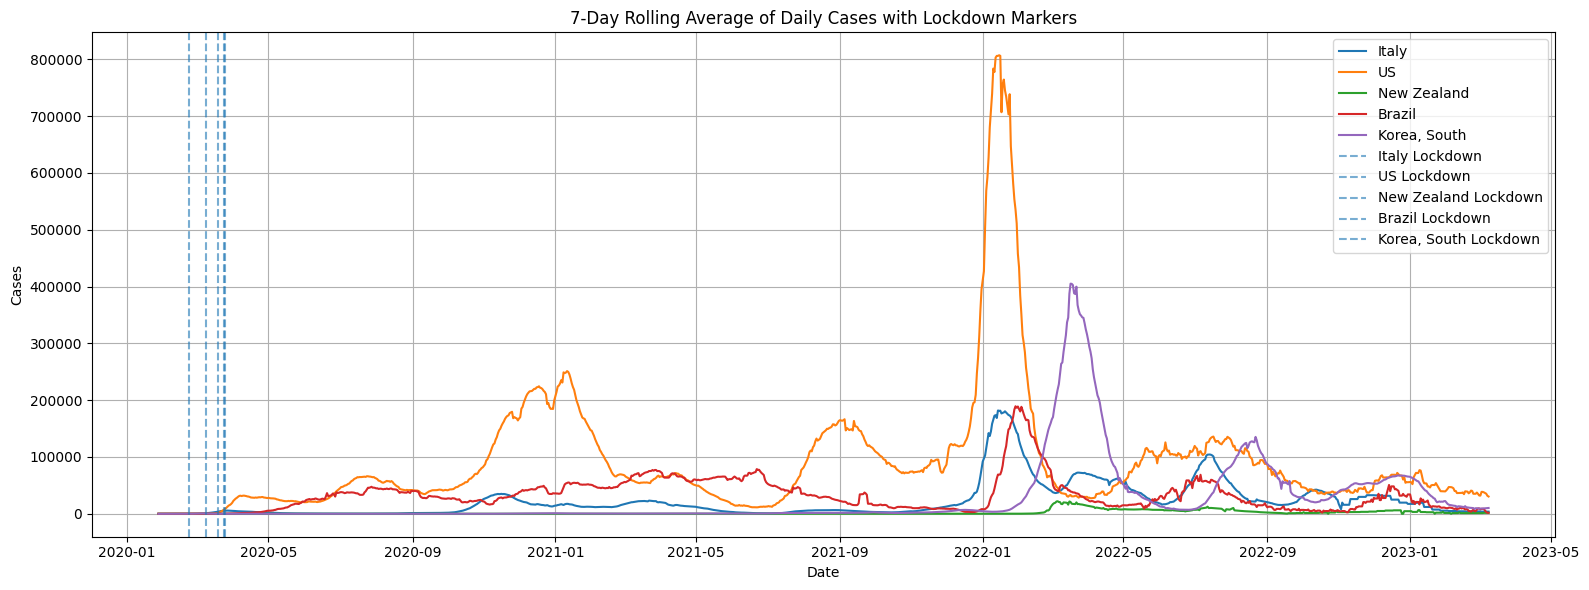

In [28]:
countries = ['Italy', 'US', 'New Zealand', 'Brazil', 'Korea, South']

# Transpose for time series (if not done)
# Exclude 'Region Encoded' before transposing
confirmed_ts = cleaned_confirmed_df.drop(columns=['Region Encoded']).T
confirmed_ts.index = pd.to_datetime(confirmed_ts.index)

# Calculate daily new cases
daily_cases = confirmed_ts[countries].diff().fillna(0)

# Apply 7-day rolling average
smoothed_cases = daily_cases.rolling(window=7).mean()


plt.figure(figsize=(16, 6))
for country in countries:
    plt.plot(smoothed_cases.index, smoothed_cases[country], label=country)

# Example: lockdown markers
interventions = {
    'Italy': '2020-03-09',
    'US': '2020-03-19',
    'New Zealand': '2020-03-25',
    'Brazil': '2020-03-24',
    'Korea, South': '2020-02-23'
}

for country, date in interventions.items():
    plt.axvline(pd.to_datetime(date), linestyle='--', alpha=0.6, label=f'{country} Lockdown')

plt.title('7-Day Rolling Average of Daily Cases with Lockdown Markers')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

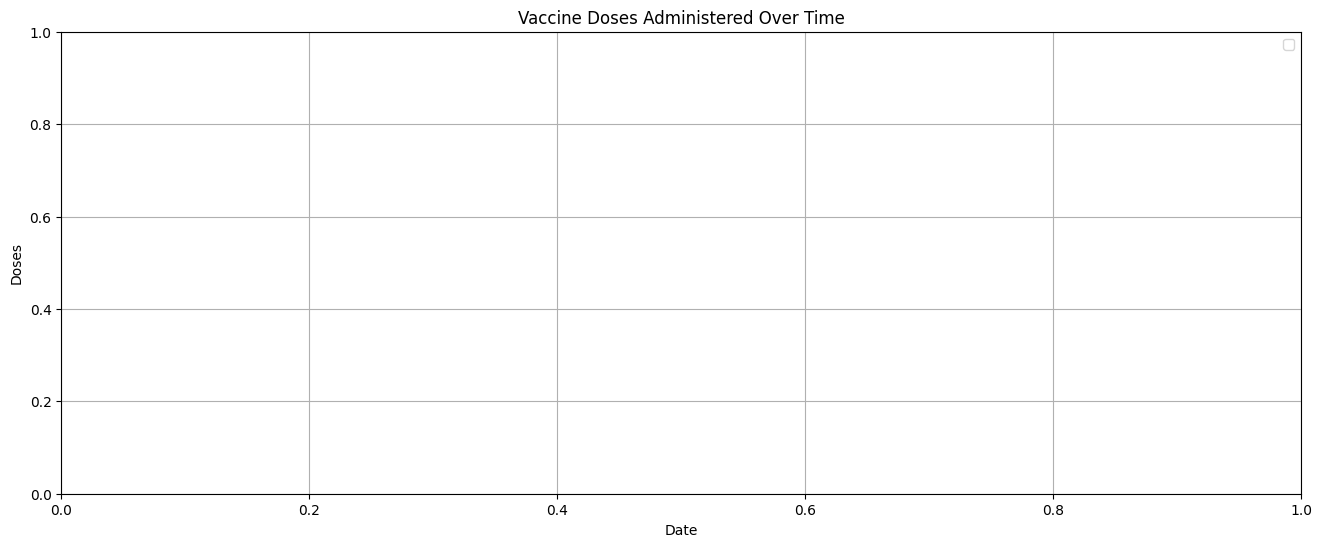

In [30]:
# Example vaccine trend comparison
vaccine_ts = cleaned_gloabl_vaccine_df.T
vaccine_ts.index = pd.to_datetime(vaccine_ts.index, errors='coerce')

plt.figure(figsize=(16, 6))
for country in countries:
    if country in vaccine_ts.columns:
        plt.plot(vaccine_ts.index, vaccine_ts[country], label=country)

plt.title('Vaccine Doses Administered Over Time')
plt.ylabel('Doses')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from scipy.integrate import odeint
import numpy as np

# Define the SIR model
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Define the function to fit the SIR model
def fit_sir_model(country, confirmed_cases, population):
    # Initial conditions (S0, I0, R0)
    S0 = population - confirmed_cases[0]
    I0 = confirmed_cases[0]
    R0 = 0
    y0 = S0, I0, R0

    # Time points
    t = np.arange(len(confirmed_cases))

    # Fit the model to the data (this is a simplified approach, a proper fit would involve optimization)
    # For demonstration, let's use some sample parameters.
    # A real-world application would require fitting beta and gamma to the data.
    # However, for the purpose of demonstrating the fix for the NameError,
    # I will use placeholder values.
    beta = 0.2
    gamma = 0.1

    # Integrate the SIR equations over the time grid
    ret = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = ret.T

    return t, S, I, R, beta, gamma

In [35]:
italy_cases = cleaned_confirmed_df.loc['Italy'].values  # Use the real cumulative confirmed cases
population_italy = 60360000  # Actual population of Italy
t, S, I, R, beta, gamma = fit_sir_model("Italy", italy_cases, population_italy)

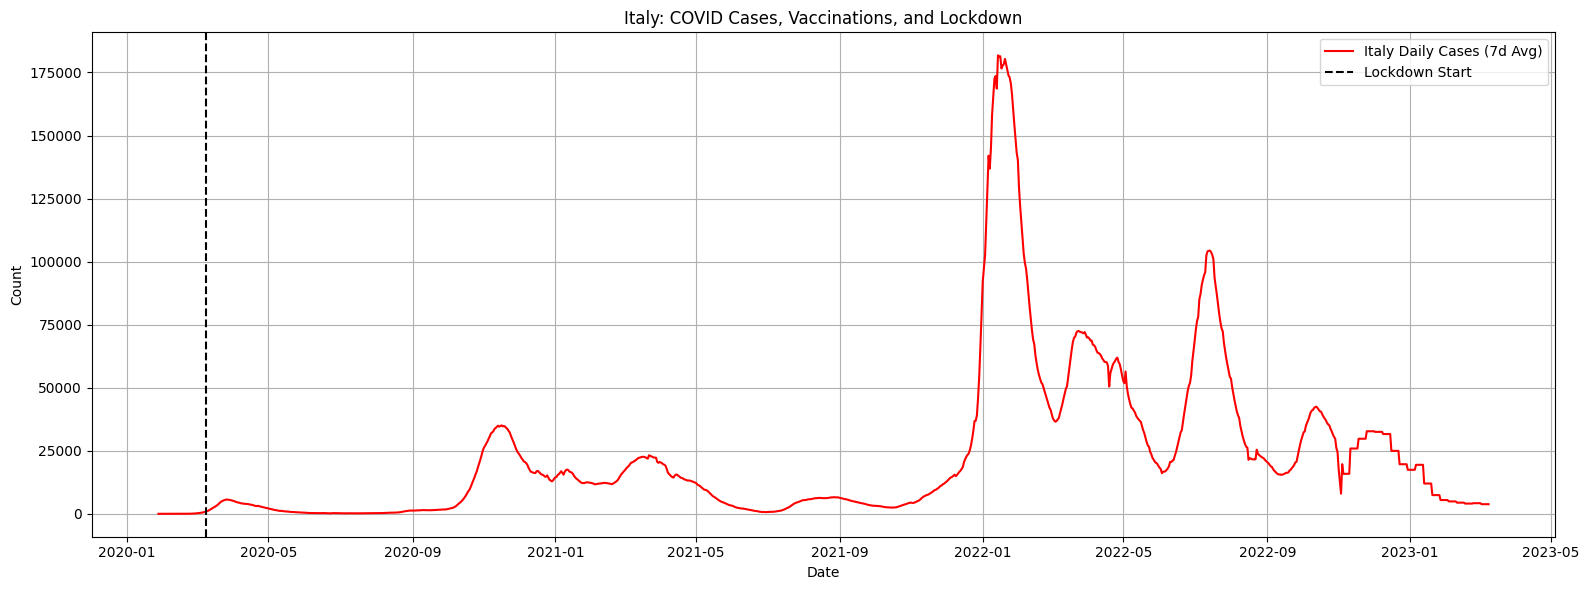

In [36]:
plt.figure(figsize=(16, 6))

# Daily cases
plt.plot(smoothed_cases['Italy'], label='Italy Daily Cases (7d Avg)', color='red')

# Vaccination doses
vaccine_ts = cleaned_gloabl_vaccine_df.T
vaccine_ts.index = pd.to_datetime(vaccine_ts.index, errors='coerce')
if 'Italy' in vaccine_ts.columns:
    plt.plot(vaccine_ts['Italy'], label='Italy Vaccine Doses', color='green')

# Lockdown marker
plt.axvline(pd.to_datetime('2020-03-09'), linestyle='--', color='black', label='Lockdown Start')

plt.title('Italy: COVID Cases, Vaccinations, and Lockdown')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
